## Sentiment Analysis for COVID-19

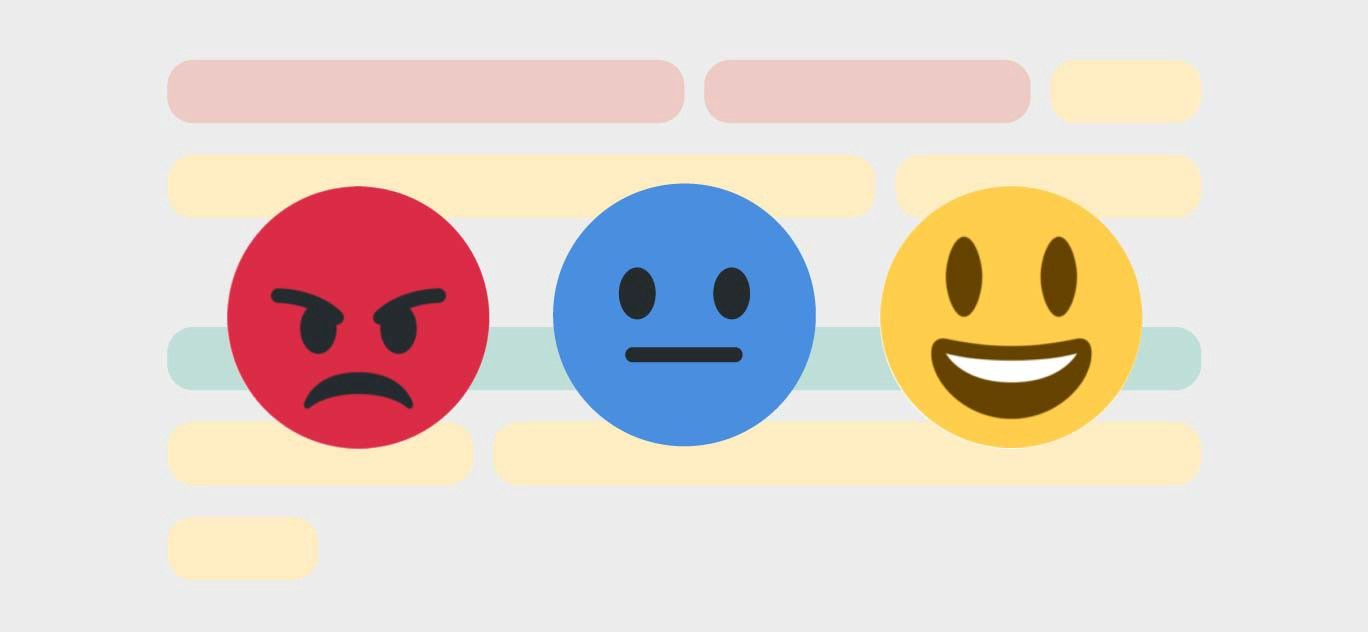
[Image source](https://www.bing.com/images/search?view=detailV2&ccid=xqnADS76&id=B105B0F97AEFE6B6CF6D34C73F8A85DFB32BD832&thid=OIP.xqnADS765YaapTH2s0RwMAHaDa&mediaurl=https%3a%2f%2fwww.freecodecamp.org%2fnews%2fcontent%2fimages%2fsize%2fw2000%2f2020%2f09%2fwall-5.jpeg&cdnurl=https%3a%2f%2fth.bing.com%2fth%2fid%2fR.c6a9c00d2efae5869aa531f6b3447030%3frik%3dMtgrs9%252bFij%252fHNA%26pid%3dImgRaw%26r%3d0&exph=632&expw=1368&q=sentiment&simid=608013171989952481&form=IRPRST&ck=2B8C552A075F74E6C62E4F0C8DE284B5&selectedindex=0&itb=0&ajaxhist=0&ajaxserp=0&first=1)

**Introduction**:
Sentiment analysis is the process of evaluating and categorizing the emotions expressed in text data. This project aims to analyze sentiment related to COVID-19 tweets using machine learning techniques. We explored how sentiments vary on Twitter and identify the most frequently used words and emotions expressed by individuals.

### Models Implemented:

- VADER Sentiment Analysis: Used as a baseline for comparison, providing sentiment scores based on lexicon and rules.
- Support Vector Classifier (SVC): Achieved an accuracy of 92%.
- Logistic Regression: Also performed well with an accuracy of 91%.
- Decision Tree: Achieved 80% accuracy.
- Deep Learning Model (LSTM): Implemented using embeddings and LSTM layers. Found challenging due to dataset size and complexity, achieving lower accuracy of 66% compared to traditional models.



In [ ]:
!pip install pyLDAvis
!pip install gensim
!pip install nltk
!pip install transformers
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.8 MB/s eta 0:00:00


In [ ]:
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [5]:
from google.colab import files

uploaded = files.upload()

Saving COVID19 Vaccine -1.xlsx to COVID19 Vaccine -1.xlsx
Saving COVID19 Vaccine .xlsx to COVID19 Vaccine .xlsx
Saving COVID19 Vaccine -2.xlsx to COVID19 Vaccine -2.xlsx
Saving COVID19 Vaccine -3.xlsx to COVID19 Vaccine -3.xlsx


In [6]:
# Initialize an empty DataFrame
combined_df = pd.DataFrame()

In [7]:
# Loop through uploaded files
for filename, content in uploaded.items():
  if filename.endswith(".xlsx") or filename.endswith(".xls"):
    try:
      # Read data from uploaded content using StringIO
      df = pd.read_excel(io.BytesIO(content), sheet_name='Tweets')

      # Check for empty DataFrame
      if not df.empty:
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    except ValueError:
      print(f"Sheet 'Tweets' not found in file: {filename}")
      continue

In [8]:
combined_df.head()

,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value
0,hope bardugoni 🌻🌻🇮🇱🇮🇱,@setiris,2021-07-29 02:54:12,600k DEAD in one year not enough to convince ...,NaN,https://www.twitter.com/user/status/1420578374...,0,0,1.06
1,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411011] \nPMC G KNH Hospital Covish\...,NaN,https://www.twitter.com/user/status/1420578362...,0,0,0.30
2,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411037] \nPMC P Rao Hospital Bibwewa...,NaN,https://www.twitter.com/user/status/1420578362...,0,0,0.30
3,BIGSTEELGUY🎮,@Bigsteelguy2,2021-07-29 02:53:40,Here's my message to Covid19 Vaccine and Face ...,NaN,https://www.twitter.com/user/status/1420578242...,0,1,1.25
4,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:52:49,Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...,NaN,https://www.twitter.com/user/status/1420578027...,0,0,0.30


In [9]:
# Checking data types
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35008 entries, 0 to 35007
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   User           35008 non-null  object        
 1   Username       35008 non-null  object        
 2   UTC Date       35008 non-null  datetime64[ns]
 3   Tweet          35008 non-null  object        
 4   Binders        0 non-null      float64       
 5   Permalink      35008 non-null  object        
 6   Retweet count  35008 non-null  int64         
 7   Likes count    35008 non-null  int64         
 8   Tweet value    35008 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.4+ MB


In [10]:
# Find the earliest date and maximum date
earliest_date = combined_df['UTC Date'].min()
maximum_date = combined_df['UTC Date'].max()

# Printing the dates
print("Earliest date:", earliest_date)
print("Maximum date:", maximum_date)

Earliest date: 2021-07-26 16:46:31
Maximum date: 2021-07-31 23:58:39


In [11]:
#Counting the number of unique usernames in the dataset
unique_usernames = combined_df['Username'].nunique()

# Printing theresult
print("Number of unique usernames:", unique_usernames)

Number of unique usernames: 8656


In [12]:
combined_df.isnull().sum()

User                 0
Username             0
UTC Date             0
Tweet                0
Binders          35008
Permalink            0
Retweet count        0
Likes count          0
Tweet value          0
dtype: int64

##Data Preprocessing

In [13]:
#importing libraries to clean the data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [14]:
# Removing irrelevant columns
combined_df = combined_df.drop(['Binders', 'Permalink', 'Tweet value',
                                   'Retweet count', 'Likes count'], axis=1)

# Check the DataFrame after dropping columns
combined_df.head()

,User,Username,UTC Date,Tweet
0,hope bardugoni 🌻🌻🇮🇱🇮🇱,@setiris,2021-07-29 02:54:12,600k DEAD in one year not enough to convince ...
1,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411011] \nPMC G KNH Hospital Covish\...
2,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411037] \nPMC P Rao Hospital Bibwewa...
3,BIGSTEELGUY🎮,@Bigsteelguy2,2021-07-29 02:53:40,Here's my message to Covid19 Vaccine and Face ...
4,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:52:49,Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...


In [15]:
combined_df.head(10)

,User,Username,UTC Date,Tweet
0,hope bardugoni 🌻🌻🇮🇱🇮🇱,@setiris,2021-07-29 02:54:12,600k DEAD in one year not enough to convince ...
1,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411011] \nPMC G KNH Hospital Covish\...
2,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411037] \nPMC P Rao Hospital Bibwewa...
3,BIGSTEELGUY🎮,@Bigsteelguy2,2021-07-29 02:53:40,Here's my message to Covid19 Vaccine and Face ...
4,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:52:49,Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...
5,JimmyG,@bets_chi,2021-07-29 02:52:16,@POTUS This economy isn’t doing anything until...
6,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:51:29,Pin Code:[411014] \nPMC P Apollo Clinic Kharad...
7,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:51:29,Pin Code:[411007] \nPMC P APOLLO CLINIC AUNDH\...
8,NEWS CENTER Maine,@newscentermaine,2021-07-29 02:51:19,VERIFY: 1-on-1 with Dr. Fauci on booster shots...
9,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:51:09,Pin Code:[411007] \nPMC P Aundh Inst Of Medi S...


In [16]:
#checking duplicates based on all the columns in the dataset
num_duplicates = combined_df.duplicated().sum()
print('There are {} duplicate tweets present in the dataset'.format(num_duplicates))

There are 0 duplicate tweets present in the dataset


In [17]:
# Checking duplicates based on 'Username' and 'Tweet' columns
num_duplicates = combined_df.duplicated(subset=['Username', 'Tweet']).sum()

# Print the result
print('''There are {} duplicate tweets present in the dataset based on the Username and Tweet,
columns'''.format(num_duplicates))

There are 4633 duplicate tweets present in the dataset based on the Username and Tweet,
columns


In [18]:
# Create the duplicate tweets df based on 'Username', and 'Tweet', columns
duplicate_tweets = combined_df.duplicated(subset=['Username', 'Tweet'])
duplicate_tweets_df = combined_df[duplicate_tweets]
duplicates_tweets_sorted = duplicate_tweets_df.sort_values(by='Username')

# The duplicates df
duplicates_tweets_sorted.head()

,User,Username,UTC Date,Tweet
28718,AJ Blackston - Financial IT Solutions Consultant,@AJBlackston,2021-07-31 07:53:08,Bring in the kids: Estonian city targets youth...
22881,AJ Blackston - Financial IT Solutions Consultant,@AJBlackston,2021-07-27 02:59:36,"Delays, More Masks and Mandatory Shots: Virus ..."
4720,AJ Blackston - Financial IT Solutions Consultant,@AJBlackston,2021-07-28 09:19:09,Covid travel: Fully jabbed from EU and US coul...
7417,AJ Blackston - Financial IT Solutions Consultant,@AJBlackston,2021-07-27 21:07:50,CDC says some vaccinated Americans should wear...
5062,AJ Blackston - Financial IT Solutions Consultant,@AJBlackston,2021-07-28 07:18:13,The Latest: Sydney to remain in lockdown as cl...


In [19]:
# Drop the duplicate rows based on 'Username' and 'Tweet'  columns, keeping the first occurrence
Combined_df_2 = combined_df.drop_duplicates(subset=['Username', 'Tweet'], keep='first')
Combined_df_2.head()

,User,Username,UTC Date,Tweet
0,hope bardugoni 🌻🌻🇮🇱🇮🇱,@setiris,2021-07-29 02:54:12,600k DEAD in one year not enough to convince ...
1,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411011] \nPMC G KNH Hospital Covish\...
2,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411037] \nPMC P Rao Hospital Bibwewa...
3,BIGSTEELGUY🎮,@Bigsteelguy2,2021-07-29 02:53:40,Here's my message to Covid19 Vaccine and Face ...
4,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:52:49,Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...


In [20]:
#checking the length of the dataframe before and after dropping duplicates
print(len(combined_df))
print(len(Combined_df_2))

35008
30375


In [21]:
#function to clean tweets
def clean_tweet_Lemmatize(tweet):
    # Remove twitter handles
    tweet = re.sub('@[^\s]+', '', tweet)

    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)

    # Remove special characters and punctuations
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Remove specific characters '_ and ̇'
    tweet = re.sub(r'[_̇]', '', tweet)

    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)

    # Remove standalone 'amp' word
    tweet = re.sub(r'\bamp\b', '', tweet, flags=re.IGNORECASE)

    # Convert to lowercase
    tweet = tweet.lower()

    # Expand contractions
    tweet = expand_contractions(tweet)

    # Tokenize the tweet
    tokens = word_tokenize(tweet)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    cleaned_tweet = ' '.join(tokens)

    return cleaned_tweet

# Define a function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

In [22]:
%%time
combined_df['cleaned_tweets_lemma'] = combined_df['Tweet'].apply(lambda x: clean_tweet_Lemmatize(x))
combined_df.head()

CPU times: user 20.1 s, sys: 985 ms, total: 21.1 s
Wall time: 21.5 s


,User,Username,UTC Date,Tweet,cleaned_tweets_lemma
0,hope bardugoni 🌻🌻🇮🇱🇮🇱,@setiris,2021-07-29 02:54:12,600k DEAD in one year not enough to convince ...,k dead one year enough convince american get f...
1,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411011] \nPMC G KNH Hospital Covish\...,pin code pmc g knh hospital covish vaccine cov...
2,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411037] \nPMC P Rao Hospital Bibwewa...,pin code pmc p rao hospital bibwewadi vaccine ...
3,BIGSTEELGUY🎮,@Bigsteelguy2,2021-07-29 02:53:40,Here's my message to Covid19 Vaccine and Face ...,message covid vaccine face mask enforcer cdc m...
4,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:52:49,Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...,pin code pmc p jehangir hosp sasoon rd vaccine...


In [23]:
combined_df['Tweet'].iloc[4]

'Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon Rd\nVaccines: COVISHIELD,\nMin Age Limit: [18,45],\nDose1 Capacity: 40,8,7,36,47,\nDose2 Capacity: 0,19,35,46,\nDates Available: 29-07-2021,30-07-2021,31-07-2021\n#VACCINE #VACCINEPUNE #COWIN #COVID19 #PUNE'

In [24]:
#checking if contractions were expanded properly
contractions_re = re.compile(r"\b\w+(?:'\w+)+\b")
contractions_check = set(re.findall(contractions_re, ' '.join(combined_df['cleaned_tweets_lemma'])))
contractions_check

set()

In [25]:
#checking for special characters in the dataset
def nonascii_set(df):
    import string
    #gives all the punctuations
    punct = set(string.punctuation)
    nonascii = set()
    for text in df['cleaned_tweets_lemma'].astype(str):
        for word in text:
            if word.isdigit() or word.isalpha() or word.isalnum() or word.isspace():
                continue
            else:
                nonascii.add(word)
    return nonascii

In [26]:
#checking for other special characters
nonascii_lst = list(set(list(nonascii_set(combined_df)) + list(nonascii_set(combined_df))))
nonascii_lst[0:15000]

[]

## Exploratory Data Analysis

In [27]:
#Checking for the number of tweets per-day
combined_df['day_month'] = combined_df['UTC Date'].dt.strftime('%d-%m')
combined_df.head()

,User,Username,UTC Date,Tweet,cleaned_tweets_lemma,day_month
0,hope bardugoni 🌻🌻🇮🇱🇮🇱,@setiris,2021-07-29 02:54:12,600k DEAD in one year not enough to convince ...,k dead one year enough convince american get f...,29-07
1,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411011] \nPMC G KNH Hospital Covish\...,pin code pmc g knh hospital covish vaccine cov...,29-07
2,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411037] \nPMC P Rao Hospital Bibwewa...,pin code pmc p rao hospital bibwewadi vaccine ...,29-07
3,BIGSTEELGUY🎮,@Bigsteelguy2,2021-07-29 02:53:40,Here's my message to Covid19 Vaccine and Face ...,message covid vaccine face mask enforcer cdc m...,29-07
4,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:52:49,Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...,pin code pmc p jehangir hosp sasoon rd vaccine...,29-07


<ipython-input-28-83bb4282c3e0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  day_group = sns.countplot(data=combined_df, x='day_month', palette=['navy'],
<ipython-input-28-83bb4282c3e0>:7: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  day_group = sns.countplot(data=combined_df, x='day_month', palette=['navy'],


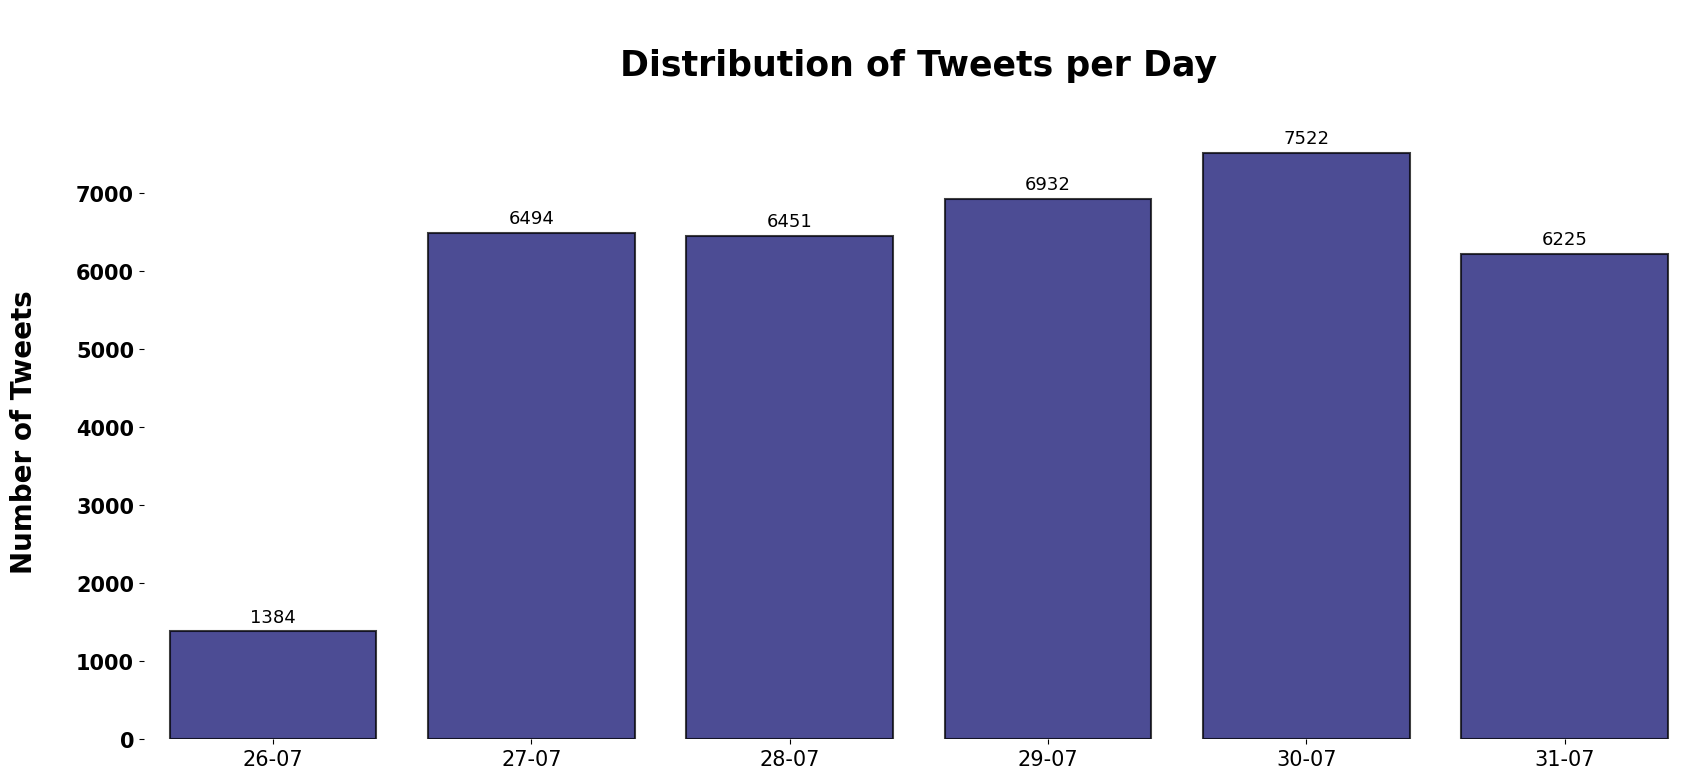

In [28]:
plt.figure(figsize=(20, 8))

# Sort the 'day_month' column by day and month (split by '-' delimiter)
sorted_days = sorted(combined_df['day_month'].unique(), key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1])))

# Create a countplot to visualize the number of tweets per day
day_group = sns.countplot(data=combined_df, x='day_month', palette=['navy'],
                          edgecolor='black', alpha=0.75, linewidth=1.5,  # Bar customization
                          order=sorted_days)

# Add labels to the top of each bar
for bars in day_group.containers:
    day_group.bar_label(bars, padding=4, fontsize=13)

# Configure plot elements
plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=15, fontweight='bold', fontname='Calibri')
plt.xticks(fontsize=15, fontname='Calibri')

# Add a title, x-axis label, and y-axis label
plt.title('\nDistribution of Tweets per Day\n', fontsize=25, fontweight='bold', fontname='Georgia')
plt.xlabel('', fontsize=20, fontweight='bold')
plt.ylabel('Number of Tweets\n', fontsize=20, fontweight='bold', fontname='Georgia')

# Remove unnecessary spines
sns.despine(top=True, right=True, left=True, bottom=True)

# Display plot
plt.show()

In [29]:
#the average number of tweets per day
average_tweets_per_day = combined_df.groupby('day_month').size().mean()
average_tweets_per_day

5834.666666666667

In [30]:
# Number of words in sentence
combined_df['Tweet_length'] = combined_df['Tweet'].apply(len)
combined_df['Lemma_length'] = combined_df['cleaned_tweets_lemma'].apply(len)
combined_df.head(20)

,User,Username,UTC Date,Tweet,cleaned_tweets_lemma,day_month,Tweet_length,Lemma_length
0,hope bardugoni 🌻🌻🇮🇱🇮🇱,@setiris,2021-07-29 02:54:12,600k DEAD in one year not enough to convince ...,k dead one year enough convince american get f...,29-07,188,137
1,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411011] \nPMC G KNH Hospital Covish\...,pin code pmc g knh hospital covish vaccine cov...,29-07,198,147
2,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411037] \nPMC P Rao Hospital Bibwewa...,pin code pmc p rao hospital bibwewadi vaccine ...,29-07,242,150
3,BIGSTEELGUY🎮,@Bigsteelguy2,2021-07-29 02:53:40,Here's my message to Covid19 Vaccine and Face ...,message covid vaccine face mask enforcer cdc m...,29-07,190,101
4,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:52:49,Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...,pin code pmc p jehangir hosp sasoon rd vaccine...,29-07,246,151
5,JimmyG,@bets_chi,2021-07-29 02:52:16,@POTUS This economy isn’t doing anything until...,economy anything force people get vaccinated g...,29-07,133,89
6,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:51:29,Pin Code:[411014] \nPMC P Apollo Clinic Kharad...,pin code pmc p apollo clinic kharadi vaccine c...,29-07,201,149
7,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:51:29,Pin Code:[411007] \nPMC P APOLLO CLINIC AUNDH\...,pin code pmc p apollo clinic aundh vaccine cov...,29-07,196,144
8,NEWS CENTER Maine,@newscentermaine,2021-07-29 02:51:19,VERIFY: 1-on-1 with Dr. Fauci on booster shots...,verify dr fauci booster shot cdc mask guideline,29-07,102,47
9,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:51:09,Pin Code:[411007] \nPMC P Aundh Inst Of Medi S...,pin code pmc p aundh inst medi sci vaccine cov...,29-07,203,147


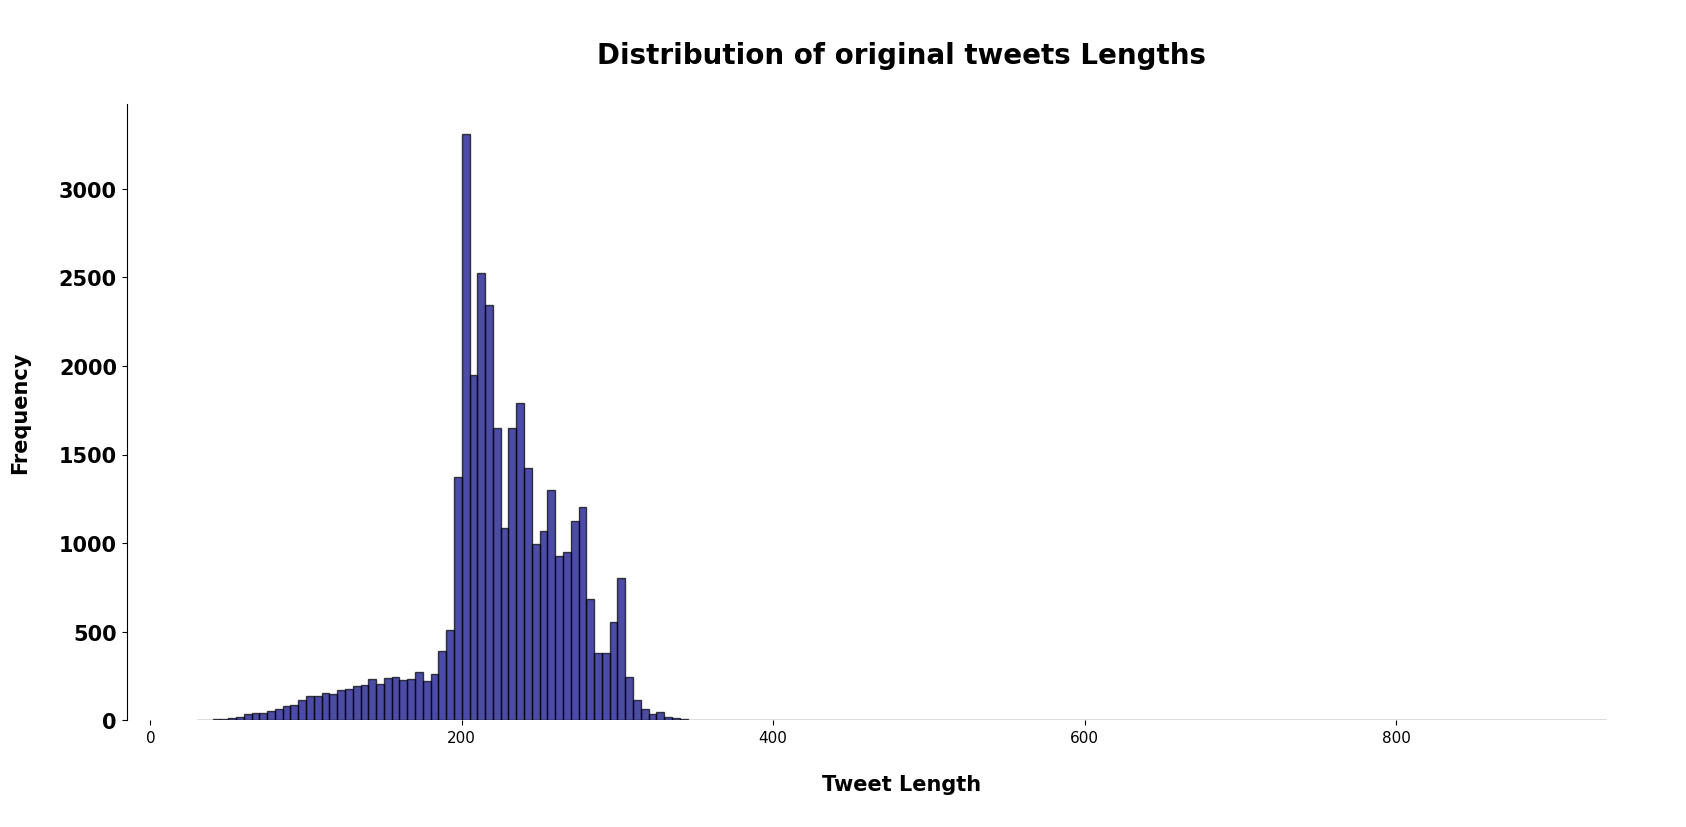

In [31]:
# Distribution of length of tweets
original_tweets_len = combined_df.Tweet_length.values

plt.figure(figsize=(20, 8))
plt.hist(original_tweets_len, bins=range(min(original_tweets_len), max(original_tweets_len) + 5, 5), edgecolor='black',
         color='navy', alpha=0.7)  # Adjust color for visual similarity to purple

plt.tick_params(bottom=True, left=True)  # Keep ticks on bottom and left
plt.yticks(fontsize=15, fontweight='bold')  # Set font size and weight for y-axis labels
plt.xticks(fontsize=11)  # Set font size for x-axis labels

plt.title('\nDistribution of original tweets Lengths\n', fontsize=20, fontweight='bold')
plt.xlabel('\nTweet Length\n', fontsize=15, fontweight='bold')
plt.ylabel('Frequency\n', fontsize=15, fontweight='bold')

sns.despine(top=True, right=True, bottom=True)

plt.show()


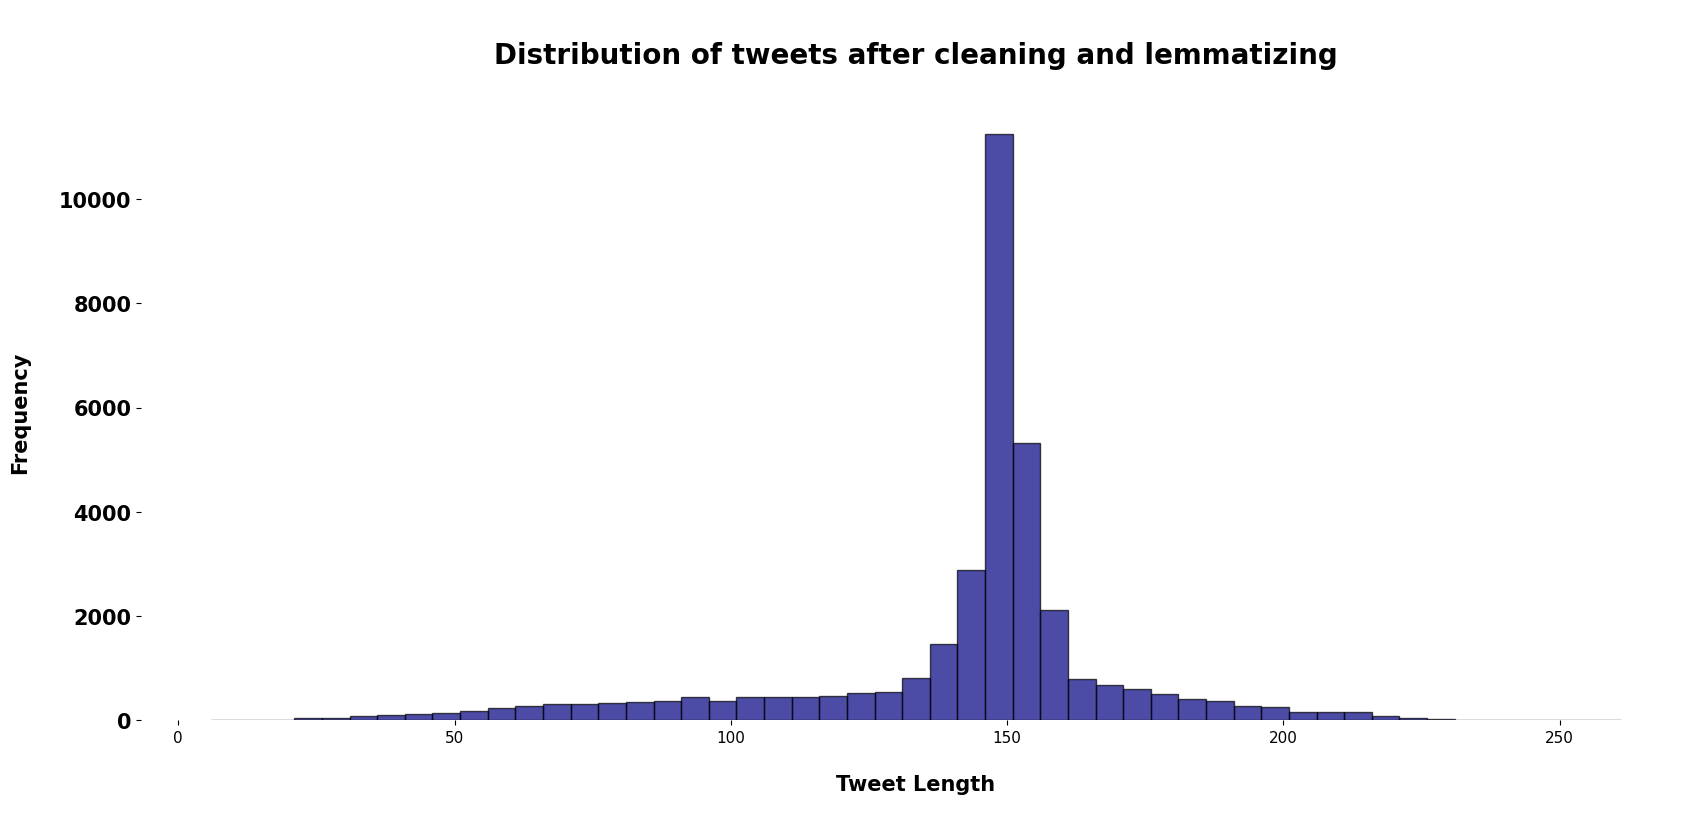

In [32]:
# Distribution of length of lemmatized tweets
lemma_tweets_len= combined_df.Lemma_length.values

plt.figure(figsize=(20, 8))
plt.hist(lemma_tweets_len, bins=range(min(lemma_tweets_len), max(lemma_tweets_len) + 5, 5), edgecolor='black',
         color='navy', alpha=0.7)


plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=15, fontweight='bold')
plt.xticks(fontsize=11)
plt.title('\nDistribution of tweets after cleaning and lemmatizing\n', fontsize=20, fontweight='bold')
plt.xlabel('\nTweet Length\n', fontsize=15, fontweight='bold')
plt.ylabel('Frequency\n', fontsize=15, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [33]:
#Distribution of number of words in tweets
combined_df['Tweet_word_count'] = combined_df['Tweet'].apply(lambda x: len(x.split()))
combined_df['Lemm_word_count'] = combined_df['cleaned_tweets_lemma'].apply(lambda x: len(x.split()))
combined_df.head()

,User,Username,UTC Date,Tweet,cleaned_tweets_lemma,day_month,Tweet_length,Lemma_length,Tweet_word_count,Lemm_word_count
0,hope bardugoni 🌻🌻🇮🇱🇮🇱,@setiris,2021-07-29 02:54:12,600k DEAD in one year not enough to convince ...,k dead one year enough convince american get f...,29-07,188,137,32,22
1,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411011] \nPMC G KNH Hospital Covish\...,pin code pmc g knh hospital covish vaccine cov...,29-07,198,147,27,23
2,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411037] \nPMC P Rao Hospital Bibwewa...,pin code pmc p rao hospital bibwewadi vaccine ...,29-07,242,150,27,23
3,BIGSTEELGUY🎮,@Bigsteelguy2,2021-07-29 02:53:40,Here's my message to Covid19 Vaccine and Face ...,message covid vaccine face mask enforcer cdc m...,29-07,190,101,29,16
4,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:52:49,Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...,pin code pmc p jehangir hosp sasoon rd vaccine...,29-07,246,151,28,24


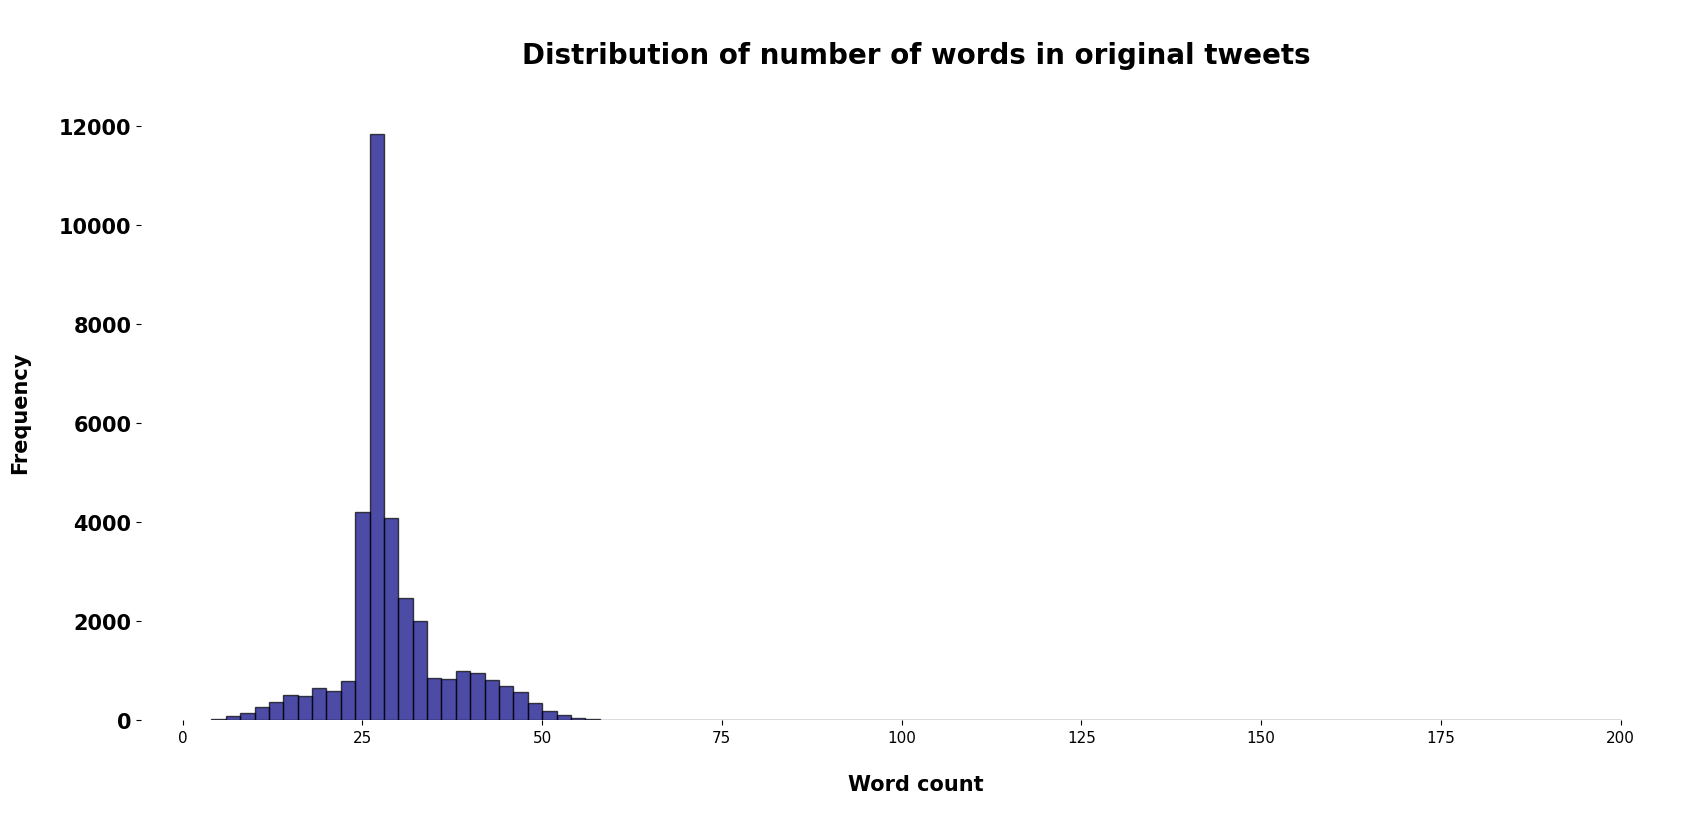

In [34]:
#Distribution of length of words in tweets
original_tweets_word_len = combined_df.Tweet_word_count.values

plt.figure(figsize=(20, 8))
plt.hist(original_tweets_word_len, bins=range(min(original_tweets_word_len), 200 + 2, 2),
         edgecolor='black', color='navy', alpha=0.7)

plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=15, fontweight='bold')
plt.xticks(fontsize=11)
plt.title('\nDistribution of number of words in original tweets\n', fontsize=20, fontweight='bold')
plt.xlabel('\nWord count\n', fontsize=15, fontweight='bold')
plt.ylabel('Frequency\n', fontsize=15, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

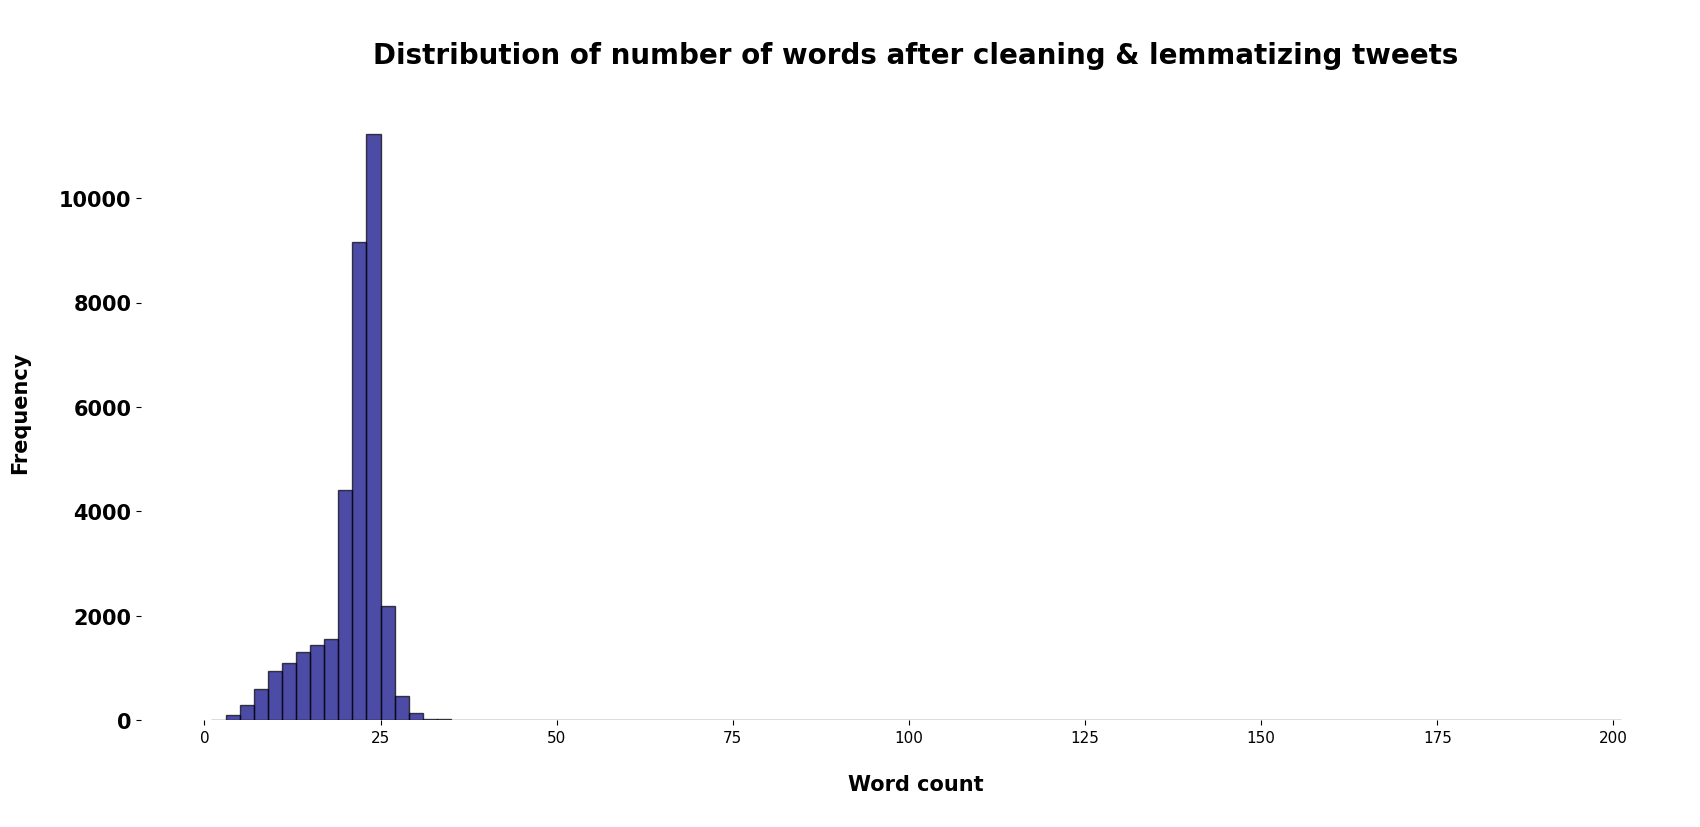

In [35]:
#Distribution of length of words in lemmatized tweets
lemm_tweets_word_len = combined_df.Lemm_word_count.values

plt.figure(figsize=(20, 8))
plt.hist(lemm_tweets_word_len, bins=range(min(lemm_tweets_word_len), 200 + 2, 2),
         edgecolor='black', color='navy', alpha=0.7)

plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=15, fontweight='bold')
plt.xticks(fontsize=11)
plt.title('\nDistribution of number of words after cleaning & lemmatizing tweets\n', fontsize=20, fontweight='bold')
plt.xlabel('\nWord count\n', fontsize=15, fontweight='bold')
plt.ylabel('Frequency\n', fontsize=15, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

<ipython-input-36-a84c7a57d197>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  tweets_less_ten = sns.countplot(x='Tweet_word_count', data=combined_df[combined_df['Tweet_word_count'] < 10],


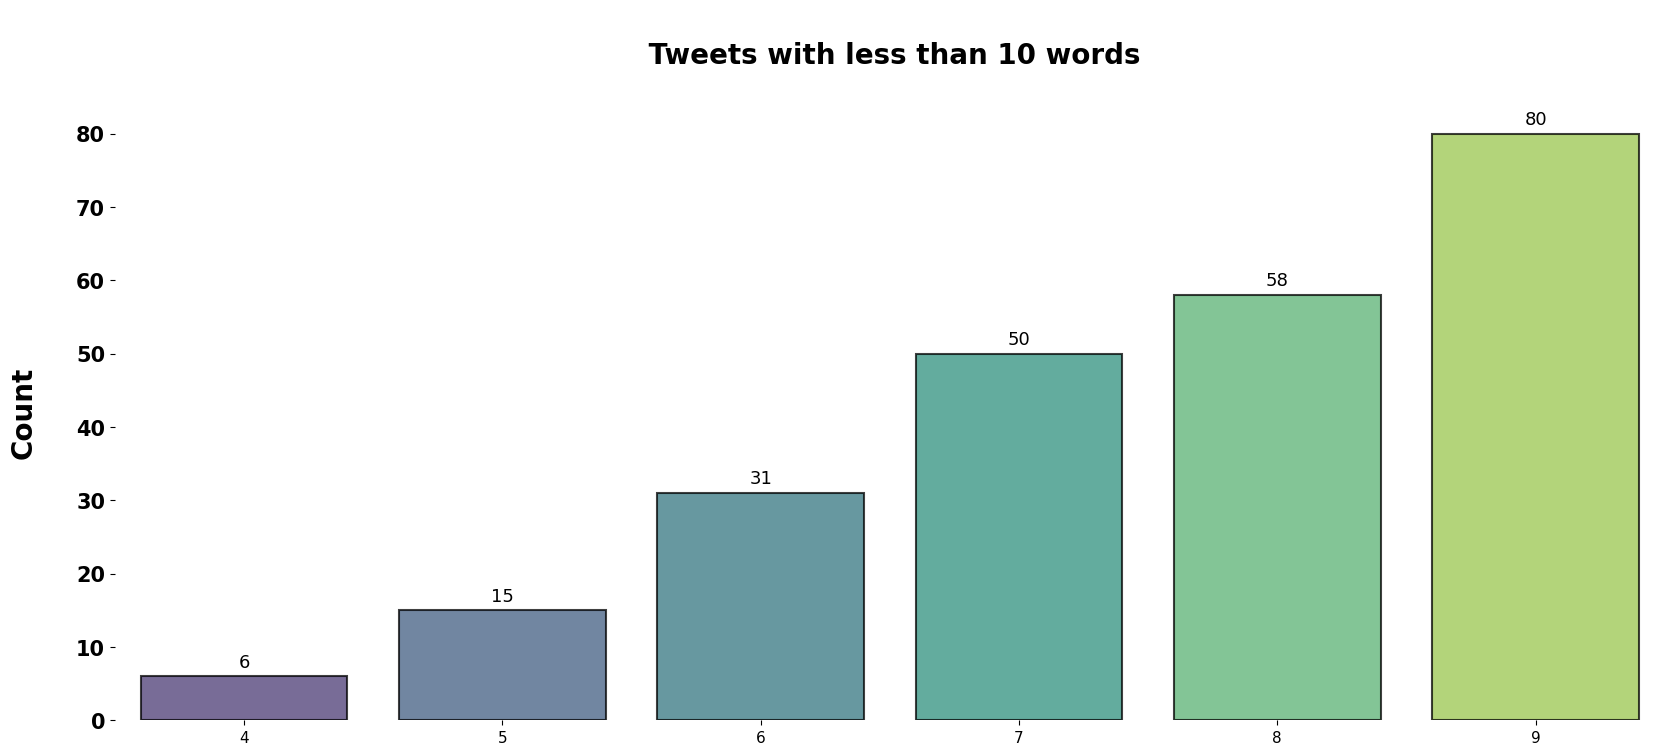

In [36]:
#original tweets with less than 10 words
plt.figure(figsize=(20, 8))
tweets_less_ten = sns.countplot(x='Tweet_word_count', data=combined_df[combined_df['Tweet_word_count'] < 10],
                                palette='viridis', edgecolor='black', alpha=0.75, linewidth=1.5)

# Adding labels to the bars
for bars in tweets_less_ten.containers:
    tweets_less_ten.bar_label(bars, padding=4, fontsize=13)


plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=15, fontweight='bold')
plt.xticks(fontsize=11)

plt.title('\n Tweets with less than 10 words\n', fontsize=20, fontweight='bold')
plt.xlabel('', fontsize=20, fontweight='bold')
plt.ylabel('Count\n', fontsize=20, fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

<ipython-input-37-0edd63db34b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  lemm_less_ten = sns.countplot(x='Lemm_word_count', data=combined_df[combined_df['Lemm_word_count'] < 10],


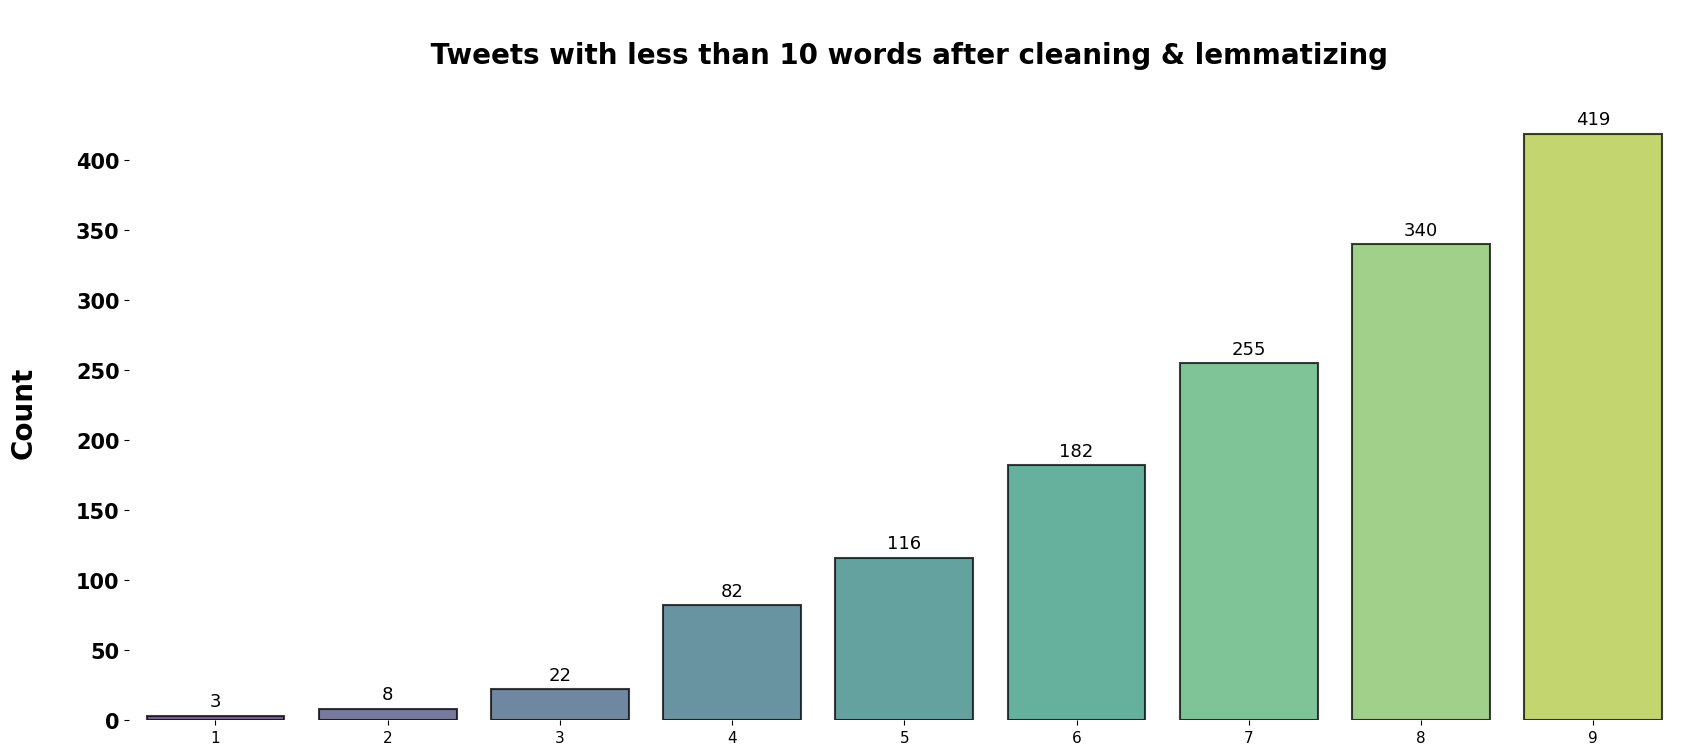

In [37]:
#lemmatized tweets with less than 10 words
plt.figure(figsize=(20, 8))
lemm_less_ten = sns.countplot(x='Lemm_word_count', data=combined_df[combined_df['Lemm_word_count'] < 10],
                                palette='viridis', edgecolor='black', alpha=0.75, linewidth=1.5)

# Adding labels to the bars
for bars in lemm_less_ten.containers:
    lemm_less_ten.bar_label(bars, padding=4, fontsize=13)


plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=15, fontweight='bold')
plt.xticks(fontsize=11)

plt.title('\n Tweets with less than 10 words after cleaning & lemmatizing\n', fontsize=20, fontweight='bold')
plt.xlabel('', fontsize=20, fontweight='bold')
plt.ylabel('Count\n', fontsize=20, fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

<ipython-input-38-39eea9a4346b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  lemm_less_ten = sns.countplot(x='Lemm_word_count', data=Covid_df_3[Covid_df_3['Lemm_word_count'] < 10],


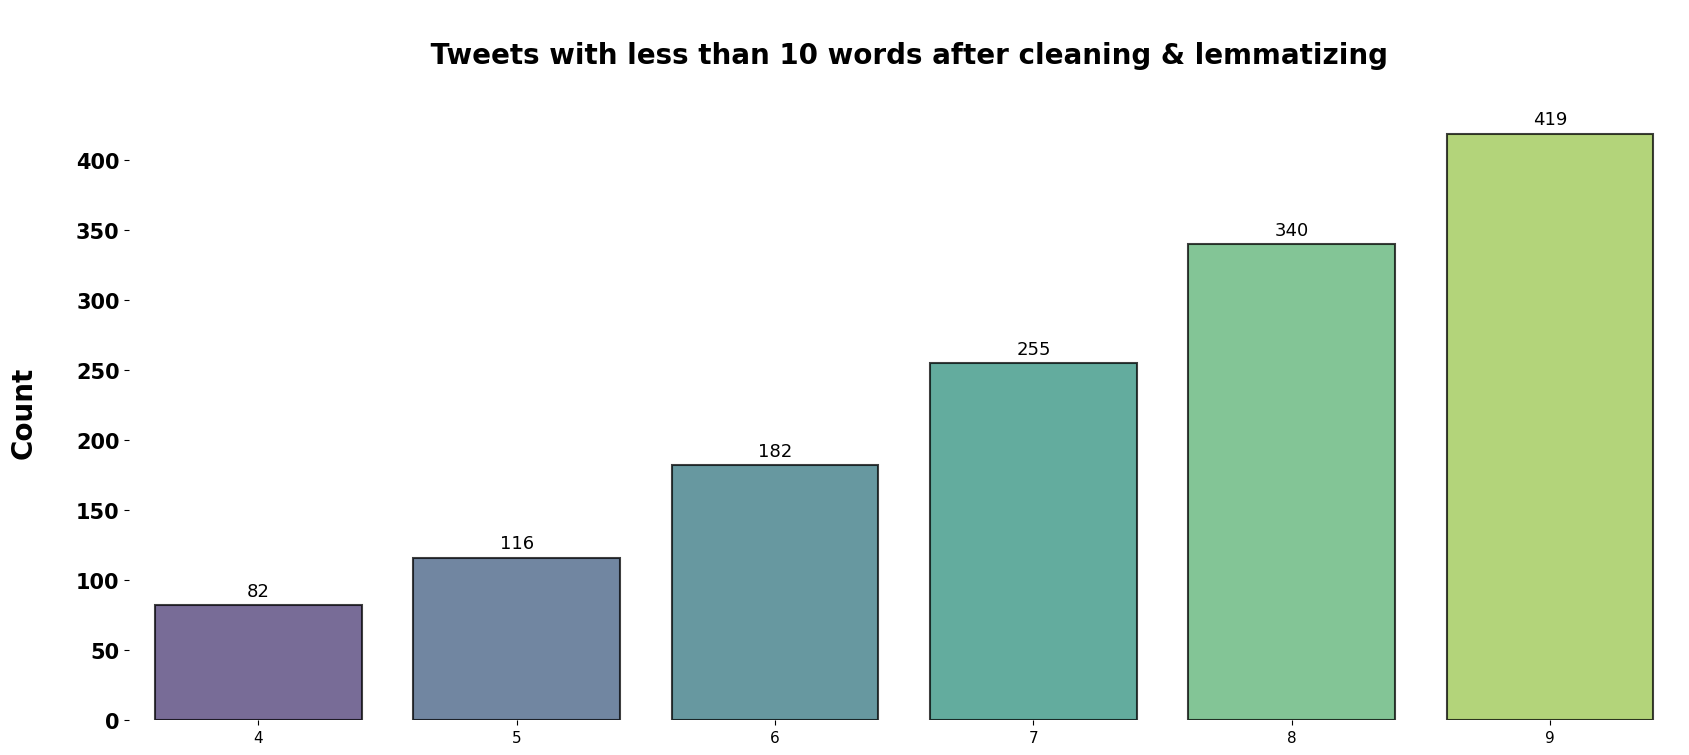

In [38]:
#Removing tweets will less than 3 words
Covid_df_3 = combined_df[(combined_df['Lemm_word_count'] > 3)]

#lemmatized tweets with less than 10 words
plt.figure(figsize=(20, 8))
lemm_less_ten = sns.countplot(x='Lemm_word_count', data=Covid_df_3[Covid_df_3['Lemm_word_count'] < 10],
                                palette='viridis', edgecolor='black', alpha=0.75, linewidth=1.5)

# Adding labels to the bars
for bars in lemm_less_ten.containers:
    lemm_less_ten.bar_label(bars, padding=4, fontsize=13)


plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=15, fontweight='bold')
plt.xticks(fontsize=11)

plt.title('\n Tweets with less than 10 words after cleaning & lemmatizing\n', fontsize=20, fontweight='bold')
plt.xlabel('', fontsize=20, fontweight='bold')
plt.ylabel('Count\n', fontsize=20, fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [39]:
from collections import Counter

if 'cleaned_tweets_lemma' in combined_df.columns:
    # Create the 'lemma_list' column
    combined_df['lemma_list'] = combined_df['cleaned_tweets_lemma'].apply(lambda x: str(x).split())

    # Check if the column was created properly
    if 'lemma_list' in combined_df.columns:

        top_lemma = Counter([item for sublist in combined_df['lemma_list'] for item in sublist])
        temp_lemma = pd.DataFrame(top_lemma.most_common(20))
        temp_lemma.columns = ['Common_words', 'count']
        temp_lemma = temp_lemma[temp_lemma['Common_words'] != 'covid']
        temp_lemma.style.background_gradient(cmap='Blues')
    else:
        print("Column 'lemma_list' was not created successfully.")
else:
    print("Column 'cleaned_tweets_lemma' does not exist in Combined_df_3.")

<ipython-input-40-f85832d835a7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  common_words_lemma = sns.barplot(data=temp_lemma, x = 'count', y='Common_words', palette='viridis',


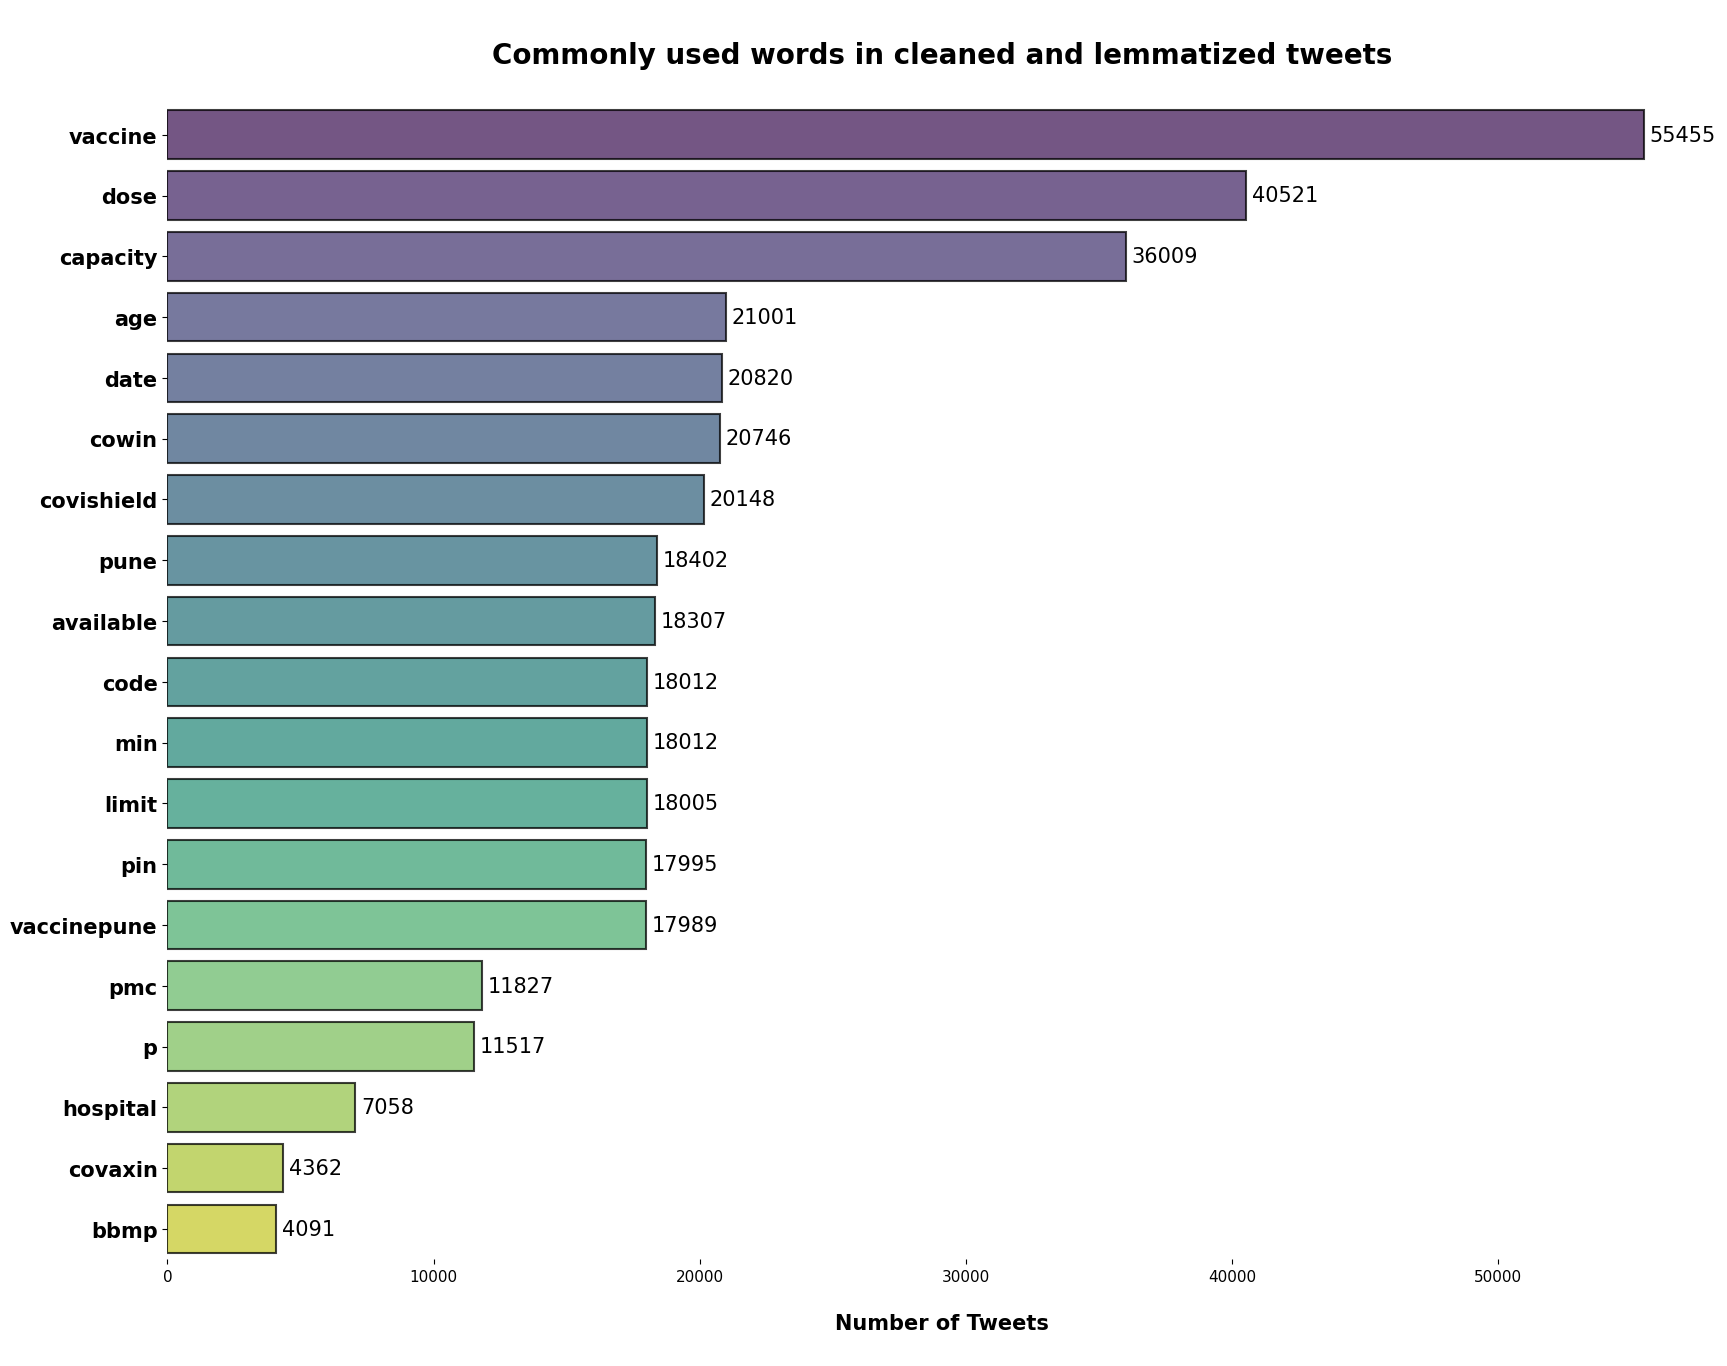

In [40]:
#Common words
plt.figure(figsize=(20, 15))

# Create the countplot and store the axis object
common_words_lemma = sns.barplot(data=temp_lemma, x = 'count', y='Common_words', palette='viridis',
                                 edgecolor='black', alpha=0.75, linewidth=1.5)

# Add labels to the bars
for bars in common_words_lemma.containers:
    common_words_lemma.bar_label(bars, padding=4, fontsize=15)

plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=15, fontweight='bold')
plt.xticks(fontsize=11)

plt.title('\nCommonly used words in cleaned and lemmatized tweets\n', fontsize=20, fontweight='bold')
plt.xlabel('\nNumber of Tweets\n', fontsize=15, fontweight='bold')
plt.ylabel('\n\n', fontsize=20, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [41]:
if 'Tweet' in combined_df.columns:
    # Create the 'original_list' column
    combined_df['original_list'] = combined_df['Tweet'].apply(lambda x: str(x).split())

    if 'original_list' in combined_df.columns:
        top = Counter([item for sublist in combined_df['original_list'] for item in sublist])
        temp = pd.DataFrame(top.most_common(20))
        temp.columns = ['Common_words', 'count']
        display(temp.style.background_gradient(cmap='Blues'))
    else:
        print("Column 'original_list' was not created successfully.")
else:
    print("Column 'Tweet' does not exist in combined_df.")

,Common_words,count
0,Capacity:,35978
1,#COVID19,30915
2,#VACCINE,18957
3,#COWIN,18607
4,#PUNE,18303
5,Age,18011
6,Min,17997
7,Vaccines:,17993
8,Pin,17990
9,Dates,17990


## Removing stopwords

In [42]:
from nltk.corpus import stopwords

nltk.download('stopwords')

# Get the English stop words list
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a list of words
def remove_stop_words(word_list):
    return [word for word in word_list if word.lower() not in stop_words]

# Ensure the DataFrame has the required column
if 'Tweet' in combined_df.columns:
    # Create the 'original_list' column by splitting the tweets into words
    combined_df['original_list'] = combined_df['Tweet'].apply(lambda x: str(x).split())

    # Create a new column 'cleaned_list' by removing stop words
    combined_df['cleaned_list'] = combined_df['original_list'].apply(remove_stop_words)

    # Check if the column was created properly
    if 'cleaned_list' in combined_df.columns:
        # Use the correct DataFrame (Combined_df_3) for processing
        top = Counter([item for sublist in combined_df['cleaned_list'] for item in sublist])
        temp = pd.DataFrame(top.most_common(20))
        temp.columns = ['Common_words', 'count']
        display(temp.style.background_gradient(cmap='Blues'))
    else:
        print("Column 'cleaned_list' was not created successfully.")
else:
    print("Column 'Tweet' does not exist in Combined_df_3.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Common_words,count
0,Capacity:,35978
1,#COVID19,30915
2,#VACCINE,18957
3,#COWIN,18607
4,#PUNE,18303
5,Age,18011
6,Min,17997
7,Vaccines:,17993
8,Pin,17990
9,Dates,17990


<ipython-input-43-e4196c54e02f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  common_words_lemma = sns.barplot(data=temp, x = 'count', y='Common_words', palette='viridis',


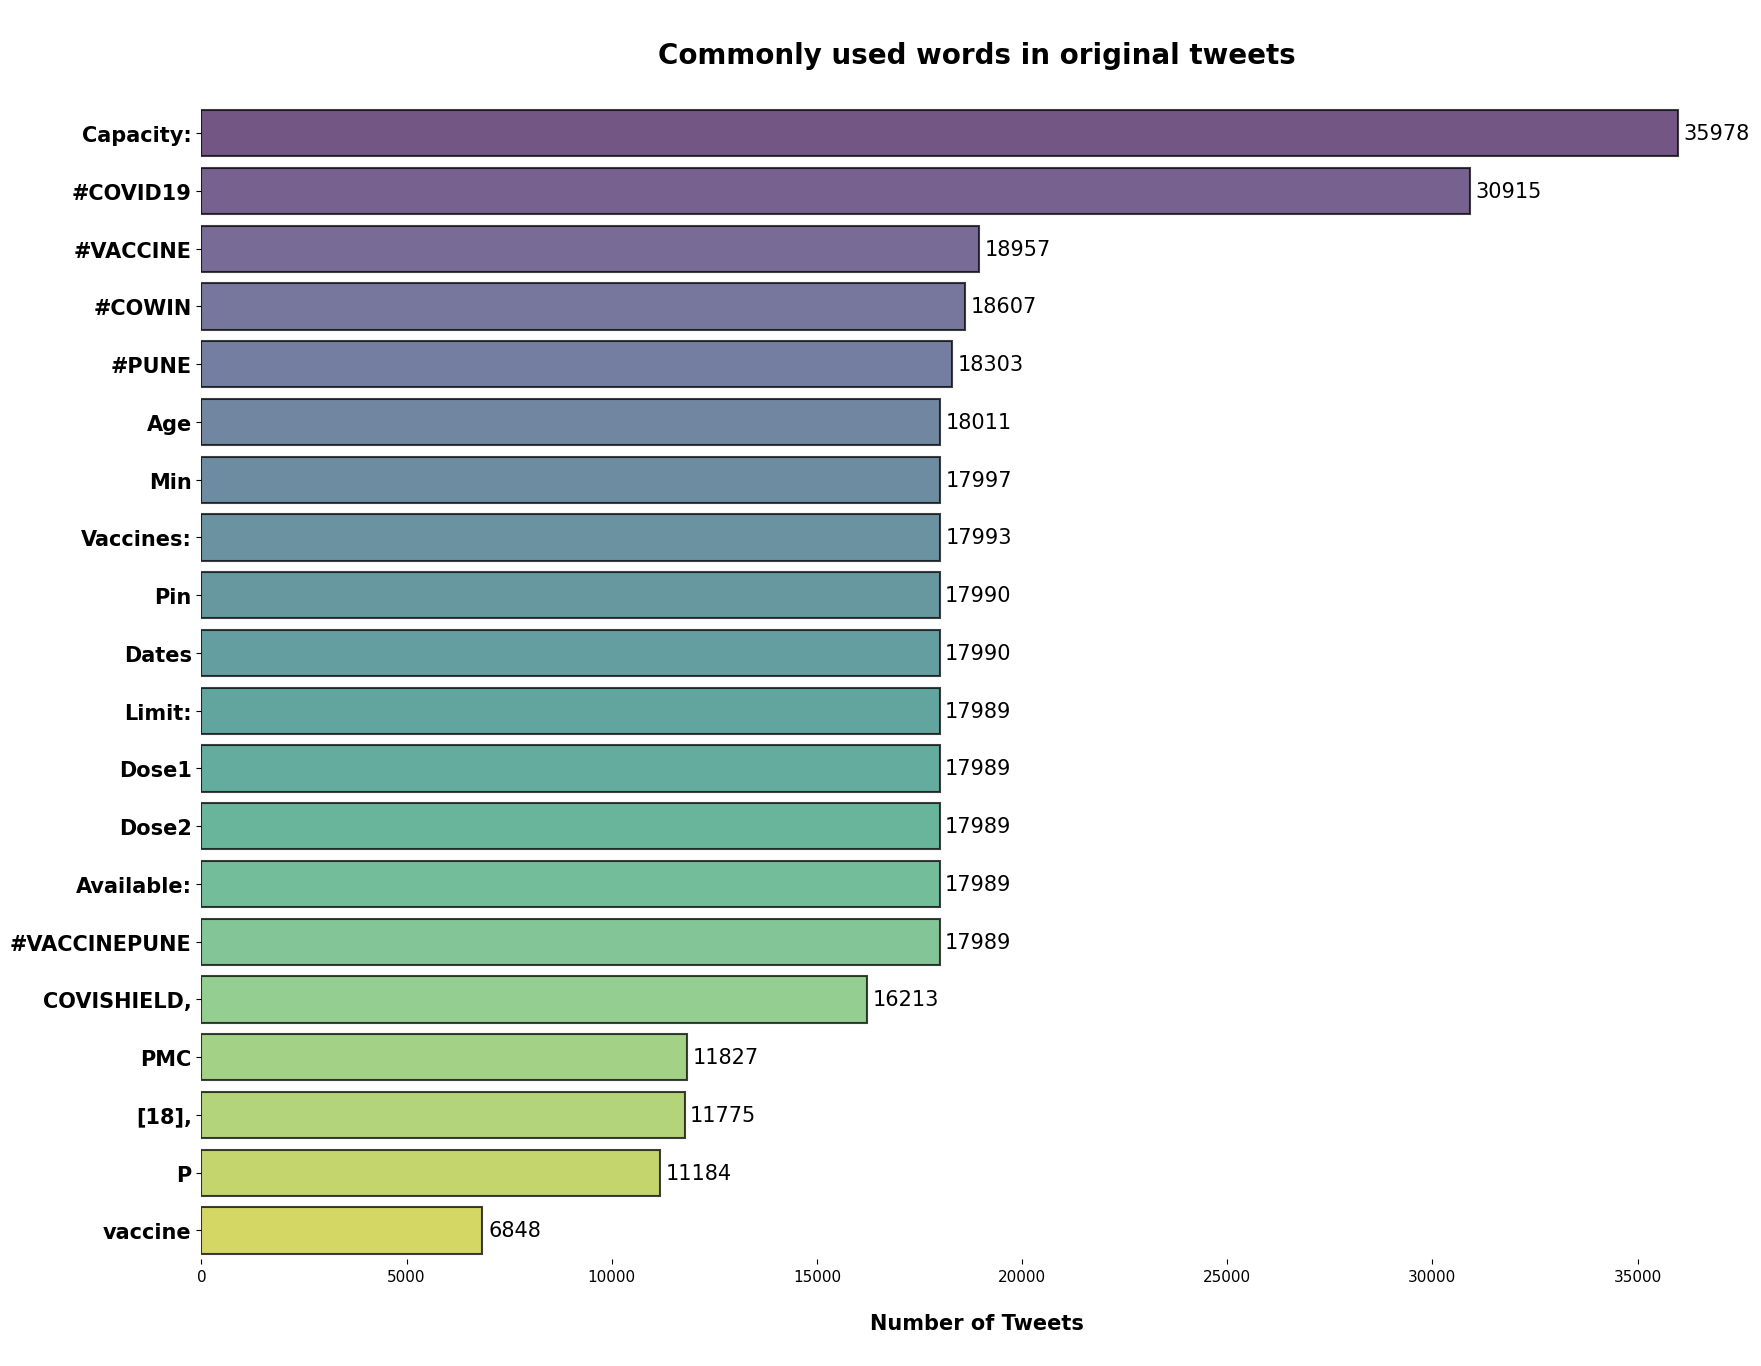

In [43]:
#Common words
plt.figure(figsize=(20, 15))

# Create the countplot and store the axis object
common_words_lemma = sns.barplot(data=temp, x = 'count', y='Common_words', palette='viridis',
                                 edgecolor='black', alpha=0.75, linewidth=1.5)

# Add labels to the bars
for bars in common_words_lemma.containers:
    common_words_lemma.bar_label(bars, padding=4, fontsize=15)

plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=15, fontweight='bold')
plt.xticks(fontsize=11)

plt.title('\nCommonly used words in original tweets\n', fontsize=20, fontweight='bold')
plt.xlabel('\nNumber of Tweets\n', fontsize=15, fontweight='bold')
plt.ylabel('\n\n', fontsize=20, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

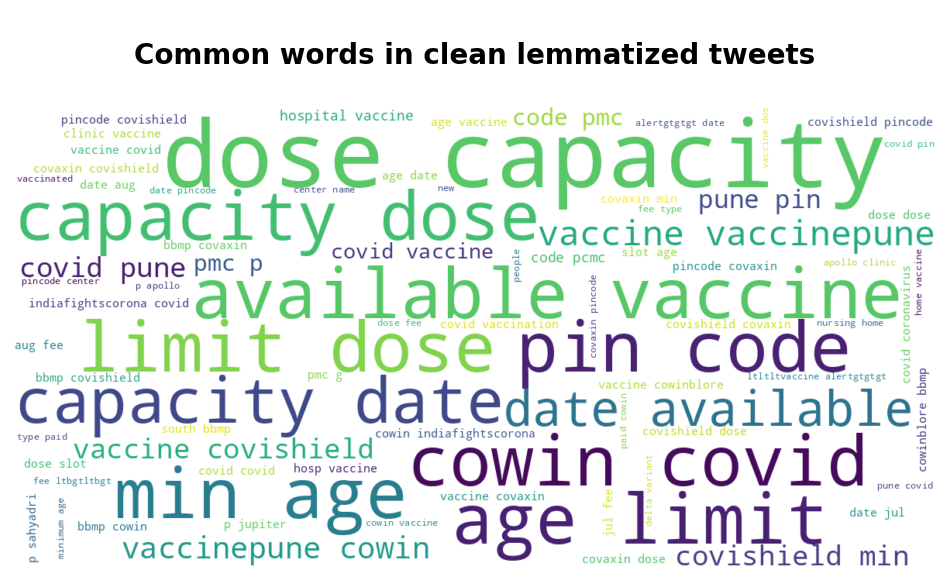

In [44]:
#function to plot wordcloud
def show_wordcloud(data, column, title=""):
    #join all the text from the specified column into a single string
    text_data = " ".join(data[column])

    #create a WordCloud object and generate the word cloud from the text data
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=42
    ).generate(text_data)

    #plot the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20, fontweight='bold')

    plt.show()

# Show word cloud for the most prevalent words in 'cleaned_tweets_lemma'
show_wordcloud(Covid_df_3, column='cleaned_tweets_lemma',
               title = '\nCommon words in clean lemmatized tweets\n')

# Topic Modeling



In [45]:
import gensim
from gensim import corpora
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
data = combined_df['cleaned_tweets_lemma'].tolist()

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

data_tokens = [preprocess(text) for text in data]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 Creating a dictionary mapping of words to IDs and a corpus that represents the text data in a format suitable for topic modeling.

In [47]:
# Creating a dictionary representation of the documents
dictionary = corpora.Dictionary(data_tokens)

# Filter out extreme values
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Creating a corpus: a list of lists of tuples
corpus = [dictionary.doc2bow(text) for text in data_tokens]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Building the LDA Model
- Creating an LDA model with specified parameters (number of topics, passes, and iterations).

In [48]:
# Set parameters
num_topics = 5
passes = 15
iterations = 400

# Build LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=passes,
    iterations=iterations,
    random_state=100
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Visualize the topics
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()

vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Saving LDA model
lda_model.save('lda_model.model')

# Save visualization
pyLDAvis.save_html(vis, 'lda_topics.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# BERT Sentiment Analysis

In [51]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import torch

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Loading the pre-trained BERT model and tokenizer that are fine-tuned for sentiment analysis.

In [52]:
# Load pre-trained model and tokenizer from transformers library
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"  # This model is pre-trained for sentiment analysis
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

Defining a pipeline using the loaded model and tokenizer to streamline the sentiment analysis process.

In [53]:
# Defining a sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There is an Issue implementing BERT

###Sentiment Analysis Utilizing VADER

In [54]:
#  Importing SentimentIntensityAnalyzer from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
%%time

sid = SentimentIntensityAnalyzer()

# Reset the index of the DataFrame
combined_df = combined_df.reset_index(drop=True)

combined_df['sentiment_scores'] = combined_df['cleaned_tweets_lemma'].apply(lambda x: sid.polarity_scores(x))

combined_df['compound_score'] = combined_df['sentiment_scores'].apply(lambda x: x['compound'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 9.01 s, sys: 46.6 ms, total: 9.06 s
Wall time: 9.12 s


In [57]:
# Adding a new column based on the results from the compound_score column
sentiment = []

for score in combined_df['compound_score']:
    if score >= 0.05:
        sentiment.append('Positive')
    elif score <= -0.05:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

combined_df['Vader_sentiment'] = sentiment
combined_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User,Username,UTC Date,Tweet,cleaned_tweets_lemma,day_month,Tweet_length,Lemma_length,Tweet_word_count,Lemm_word_count,lemma_list,original_list,cleaned_list,sentiment_scores,compound_score,Vader_sentiment
0,hope bardugoni 🌻🌻🇮🇱🇮🇱,@setiris,2021-07-29 02:54:12,600k DEAD in one year not enough to convince ...,k dead one year enough convince american get f...,29-07,188,137,32,22,"[k, dead, one, year, enough, convince, america...","[600k, DEAD, in, one, year, not, enough, to, c...","[600k, DEAD, one, year, enough, convince, Amer...","{'neg': 0.457, 'neu': 0.339, 'pos': 0.204, 'co...",-0.8934,Negative
1,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411011] \nPMC G KNH Hospital Covish\...,pin code pmc g knh hospital covish vaccine cov...,29-07,198,147,27,23,"[pin, code, pmc, g, knh, hospital, covish, vac...","[Pin, Code:[411011], PMC, G, KNH, Hospital, Co...","[Pin, Code:[411011], PMC, G, KNH, Hospital, Co...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411037] \nPMC P Rao Hospital Bibwewa...,pin code pmc p rao hospital bibwewadi vaccine ...,29-07,242,150,27,23,"[pin, code, pmc, p, rao, hospital, bibwewadi, ...","[Pin, Code:[411037], PMC, P, Rao, Hospital, Bi...","[Pin, Code:[411037], PMC, P, Rao, Hospital, Bi...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,BIGSTEELGUY🎮,@Bigsteelguy2,2021-07-29 02:53:40,Here's my message to Covid19 Vaccine and Face ...,message covid vaccine face mask enforcer cdc m...,29-07,190,101,29,16,"[message, covid, vaccine, face, mask, enforcer...","[Here's, my, message, to, Covid19, Vaccine, an...","[Here's, message, Covid19, Vaccine, Face, Mask...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:52:49,Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...,pin code pmc p jehangir hosp sasoon rd vaccine...,29-07,246,151,28,24,"[pin, code, pmc, p, jehangir, hosp, sasoon, rd...","[Pin, Code:[411001], PMC, P, Jehangir, Hosp, S...","[Pin, Code:[411001], PMC, P, Jehangir, Hosp, S...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


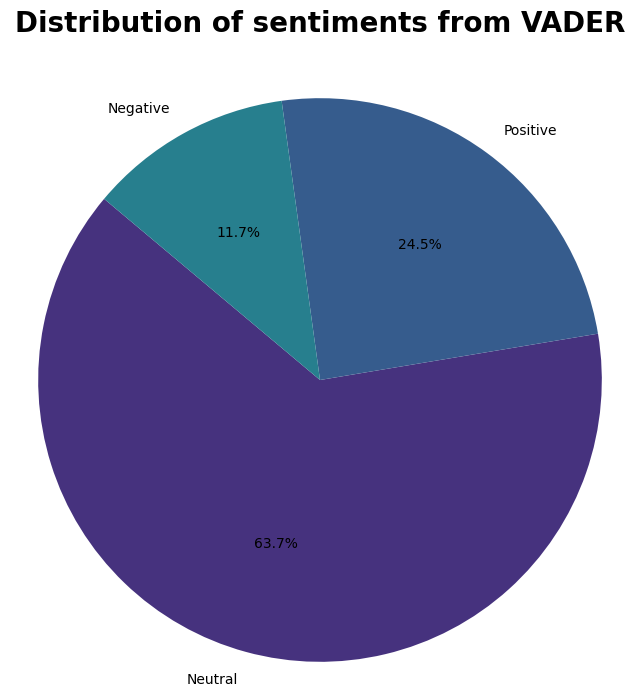

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sentiment counts
sentiment_counts = combined_df['Vader_sentiment'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140)
plt.title('Distribution of sentiments from VADER\n', fontsize=20, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [59]:
from datetime import datetime
combined_df['Date_month'] = pd.to_datetime(combined_df['UTC Date'])
combined_df['Date_month'] = combined_df['UTC Date'].dt.strftime('%d-%m-%Y')
combined_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User,Username,UTC Date,Tweet,cleaned_tweets_lemma,day_month,Tweet_length,Lemma_length,Tweet_word_count,Lemm_word_count,lemma_list,original_list,cleaned_list,sentiment_scores,compound_score,Vader_sentiment,Date_month
0,hope bardugoni 🌻🌻🇮🇱🇮🇱,@setiris,2021-07-29 02:54:12,600k DEAD in one year not enough to convince ...,k dead one year enough convince american get f...,29-07,188,137,32,22,"[k, dead, one, year, enough, convince, america...","[600k, DEAD, in, one, year, not, enough, to, c...","[600k, DEAD, one, year, enough, convince, Amer...","{'neg': 0.457, 'neu': 0.339, 'pos': 0.204, 'co...",-0.8934,Negative,29-07-2021
1,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411011] \nPMC G KNH Hospital Covish\...,pin code pmc g knh hospital covish vaccine cov...,29-07,198,147,27,23,"[pin, code, pmc, g, knh, hospital, covish, vac...","[Pin, Code:[411011], PMC, G, KNH, Hospital, Co...","[Pin, Code:[411011], PMC, G, KNH, Hospital, Co...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,29-07-2021
2,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:54:09,Pin Code:[411037] \nPMC P Rao Hospital Bibwewa...,pin code pmc p rao hospital bibwewadi vaccine ...,29-07,242,150,27,23,"[pin, code, pmc, p, rao, hospital, bibwewadi, ...","[Pin, Code:[411037], PMC, P, Rao, Hospital, Bi...","[Pin, Code:[411037], PMC, P, Rao, Hospital, Bi...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,29-07-2021
3,BIGSTEELGUY🎮,@Bigsteelguy2,2021-07-29 02:53:40,Here's my message to Covid19 Vaccine and Face ...,message covid vaccine face mask enforcer cdc m...,29-07,190,101,29,16,"[message, covid, vaccine, face, mask, enforcer...","[Here's, my, message, to, Covid19, Vaccine, an...","[Here's, message, Covid19, Vaccine, Face, Mask...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,29-07-2021
4,Pune Vaccine Updater,@PuneUpdater,2021-07-29 02:52:49,Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...,pin code pmc p jehangir hosp sasoon rd vaccine...,29-07,246,151,28,24,"[pin, code, pmc, p, jehangir, hosp, sasoon, rd...","[Pin, Code:[411001], PMC, P, Jehangir, Hosp, S...","[Pin, Code:[411001], PMC, P, Jehangir, Hosp, S...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,29-07-2021


In [60]:
sentiment_counts = combined_df[['Date_month', 'Vader_sentiment', 'cleaned_tweets_lemma']]
sentiment_counts = combined_df.groupby(['Date_month', 'Vader_sentiment' ]).size().reset_index(name='Count')
sentiment_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date_month,Vader_sentiment,Count
0,26-07-2021,Negative,266
1,26-07-2021,Neutral,584
2,26-07-2021,Positive,534
3,27-07-2021,Negative,658
4,27-07-2021,Neutral,4309
5,27-07-2021,Positive,1527
6,28-07-2021,Negative,686
7,28-07-2021,Neutral,4119
8,28-07-2021,Positive,1646
9,29-07-2021,Negative,789


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-61-44965b032ab5>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melted_data, x='Date', y='Count', hue='Sentiment', estimator='sum', ci=None, marker='o')


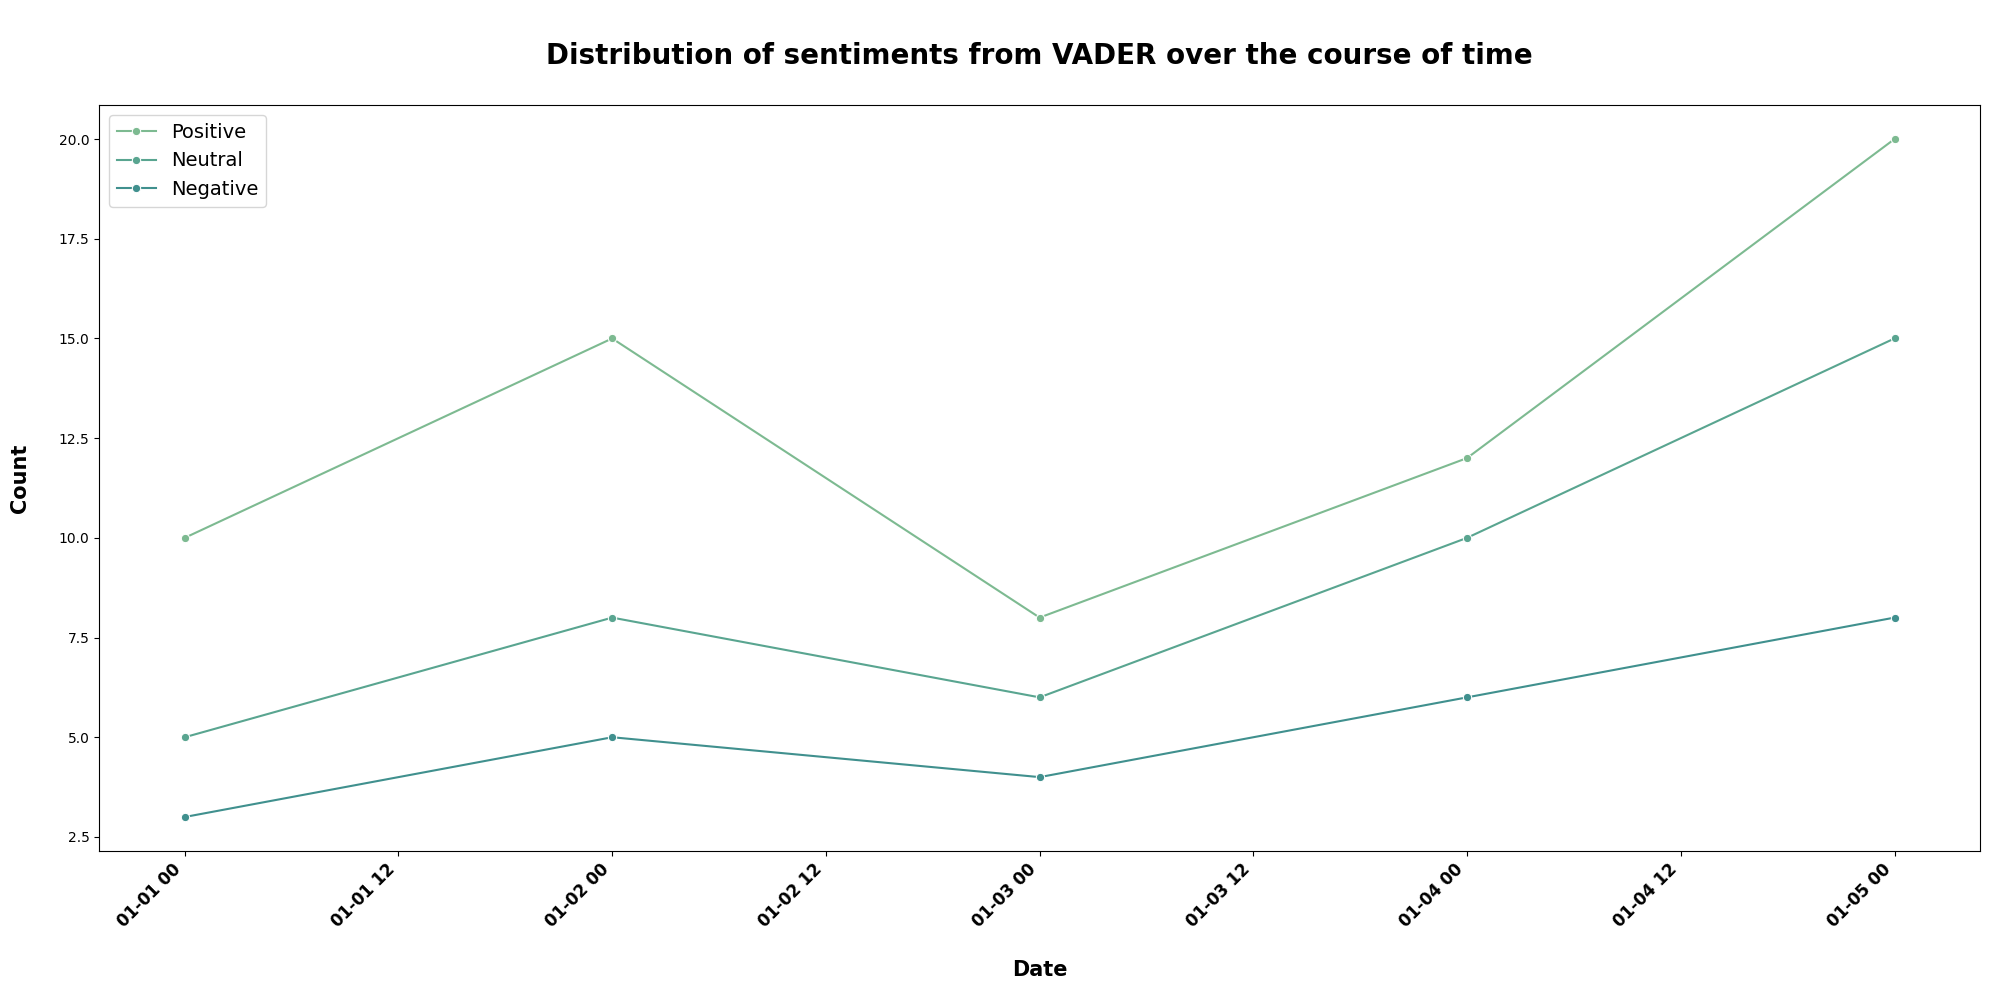

In [61]:
dates = ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05']
positive_counts = [10, 15, 8, 12, 20]
neutral_counts = [5, 8, 6, 10, 15]
negative_counts = [3, 5, 4, 6, 8]

# Create a DataFrame for illustration (replace with your actual data)
data = pd.DataFrame({
    'Date': dates,
    'Positive': positive_counts,
    'Neutral': neutral_counts,
    'Negative': negative_counts
})

data['Date'] = pd.to_datetime(data['Date'])
melted_data = data.melt(id_vars='Date', var_name='Sentiment', value_name='Count')

# Plot stacked area chart
plt.figure(figsize=(20, 10))
sns.set_palette('crest')
sns.lineplot(data=melted_data, x='Date', y='Count', hue='Sentiment', estimator='sum', ci=None, marker='o')

# Set x-axis labels as dates
plt.xticks(fontsize=12, fontweight='bold', rotation=45, ha='right')

plt.title('\nDistribution of sentiments from VADER over the course of time\n', fontsize=20, fontweight='bold')
plt.xlabel('\nDate', fontsize=15, fontweight='bold')
plt.ylabel('Count\n', fontsize=15, fontweight='bold')

plt.legend(fontsize=14)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


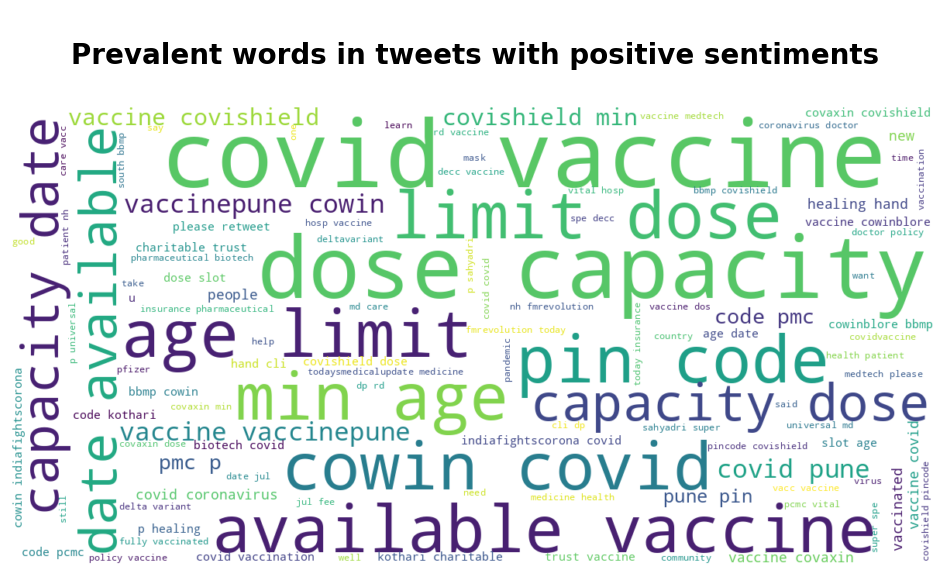

In [62]:
# print wordcloud for positive tweets
show_wordcloud(combined_df.loc[combined_df['Vader_sentiment'] == 'Positive'],
               column = 'cleaned_tweets_lemma',
               title = '\nPrevalent words in tweets with positive sentiments\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


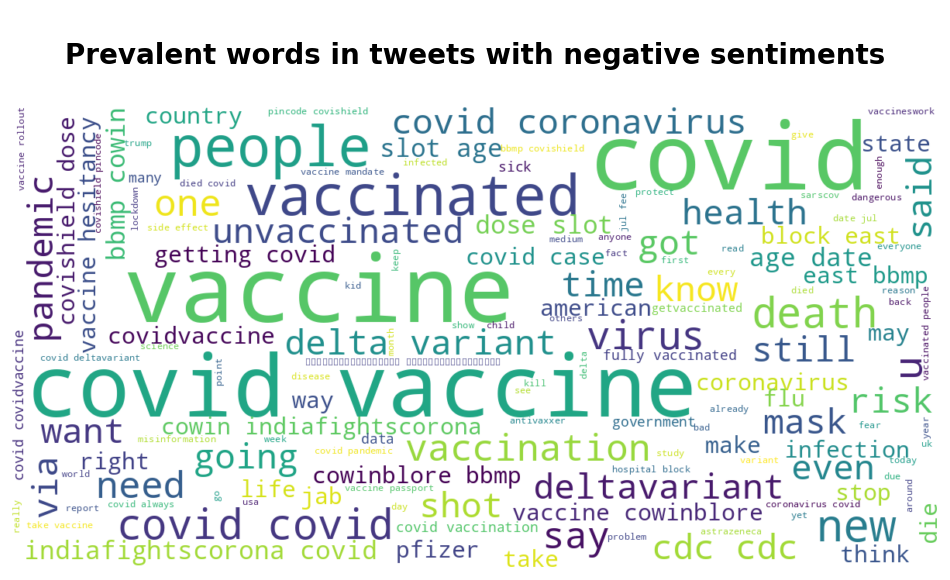

In [63]:
# print wordcloud for negative tweets
show_wordcloud(combined_df.loc[combined_df['Vader_sentiment'] == 'Negative'],
               column = 'cleaned_tweets_lemma',
               title = '\nPrevalent words in tweets with negative sentiments\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


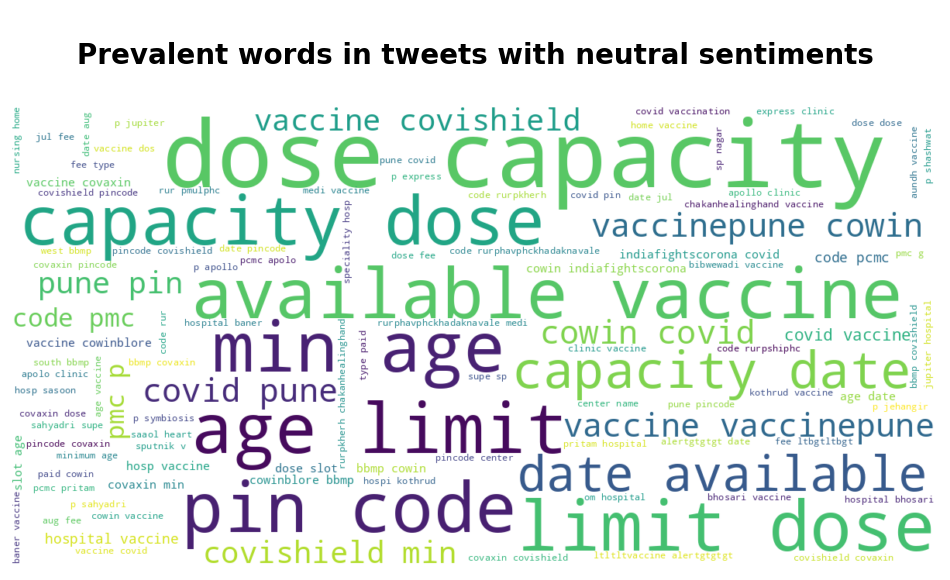

In [64]:
# print wordcloud for neutral tweets
show_wordcloud(combined_df.loc[combined_df['Vader_sentiment'] == 'Neutral'],
               column = 'cleaned_tweets_lemma',
               title = '\nPrevalent words in tweets with neutral sentiments\n')

In [65]:
# Importing CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This function extracts the top n n-grams (combinations of n consecutive words) from a given corpus of text data using CountVectorizer from scikit-learn.

Parameters:
- corpus (list): A list of strings where each string represents a document or text sample.
- n (int): Number of top n-grams to extract based on their frequency.
- g (int or tuple): Specifies the n-gram range to consider. For example, (1, 1) for unigrams, (1, 2) for unigrams and bigrams, etc.

In [66]:
# Function for n_grams
# https://www.kaggle.com/code/harshsingh2209/complete-guide-to-eda-on-text-data
def get_top_text_ngrams(corpus, n, g):
    """
    Extracts the top 'n' n-grams (where n is the number of top n-grams to extract)
    from the given 'corpus' of text data using 'g'-grams (unigrams, bigrams, etc.).

    Parameters:
    - corpus (list): A list of strings where each string represents a text document.
    - n (int): Number of top n-grams to extract.
    - g (int or tuple): n-gram range to consider (e.g., (1, 1) for unigrams, (1, 2) for unigrams and bigrams).

    Returns:
    - list: A list of tuples containing the top n n-grams and their frequencies in the corpus.
    """
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# Function to get top ngrams
def get_top_text_ngrams(corpus, n, ngram_range):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-68-4c701fa47577>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()), palette='viridis')


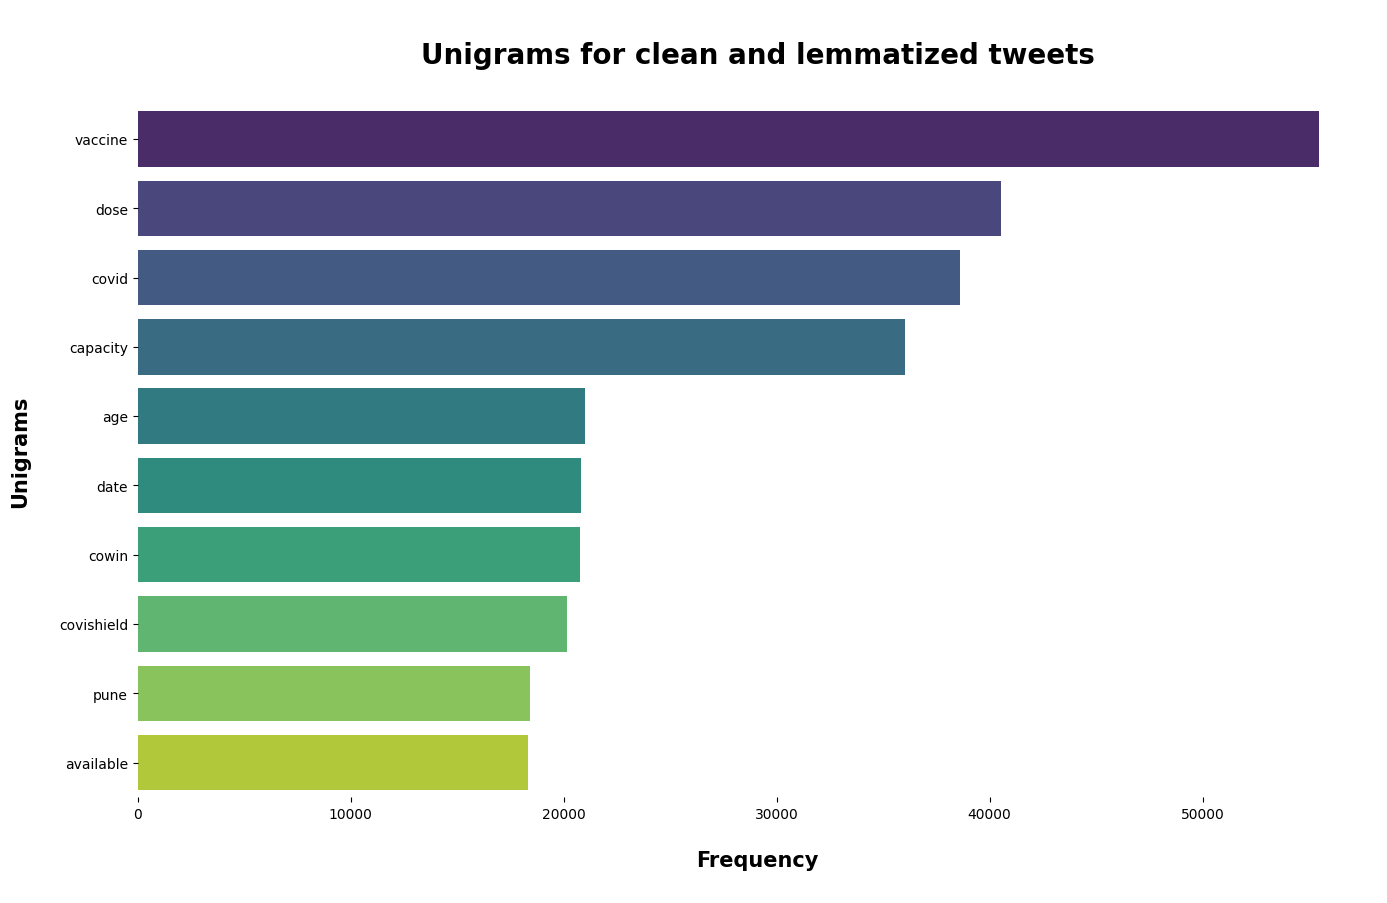

In [68]:
plt.figure(figsize=(16, 9))
most_common_uni = get_top_text_ngrams(combined_df['cleaned_tweets_lemma'], 10, (1, 1))
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()), palette='viridis')

plt.title('\nUnigrams for clean and lemmatized tweets\n', fontsize=20, fontweight='bold')
plt.xlabel('\nFrequency\n', fontsize=15, fontweight='bold')
plt.ylabel('Unigrams\n', fontsize=15, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-69-5c65526ac033>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(most_common_bi.values()), y=list(most_common_bi.keys()), palette='viridis')


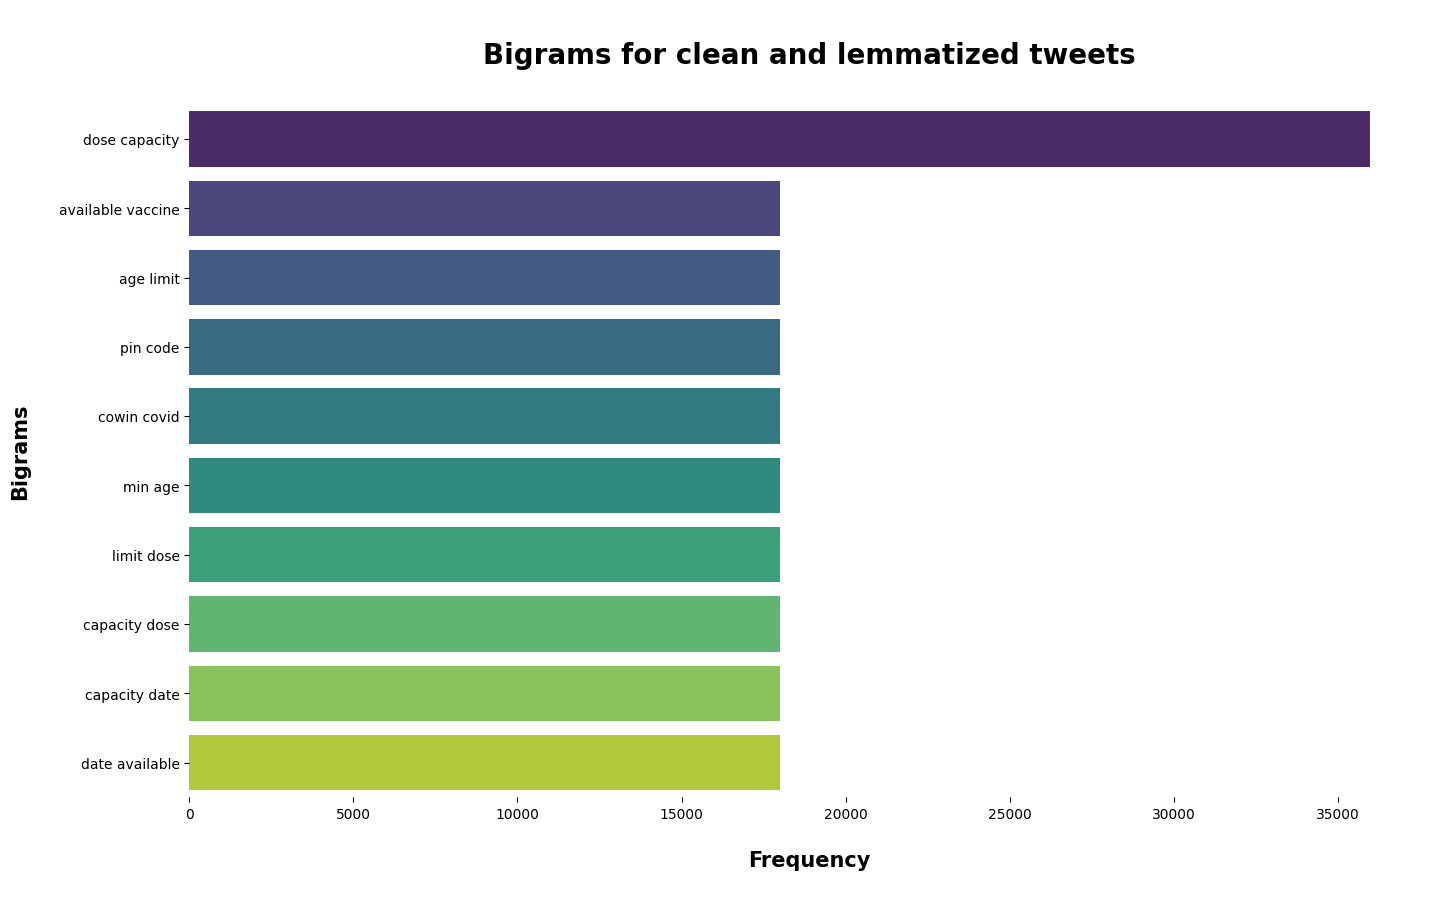

In [69]:
plt.figure(figsize=(16, 9))
most_common_bi = get_top_text_ngrams(combined_df['cleaned_tweets_lemma'], 10, (2, 2))
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()), y=list(most_common_bi.keys()), palette='viridis')

plt.title('\nBigrams for clean and lemmatized tweets\n', fontsize=20, fontweight='bold')
plt.xlabel('\nFrequency\n', fontsize=15, fontweight='bold')
plt.ylabel('Bigrams\n', fontsize=15, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-70-cf846d1df829>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(most_common_tri.values()), y=list(most_common_tri.keys()), palette='viridis', ax=ax)


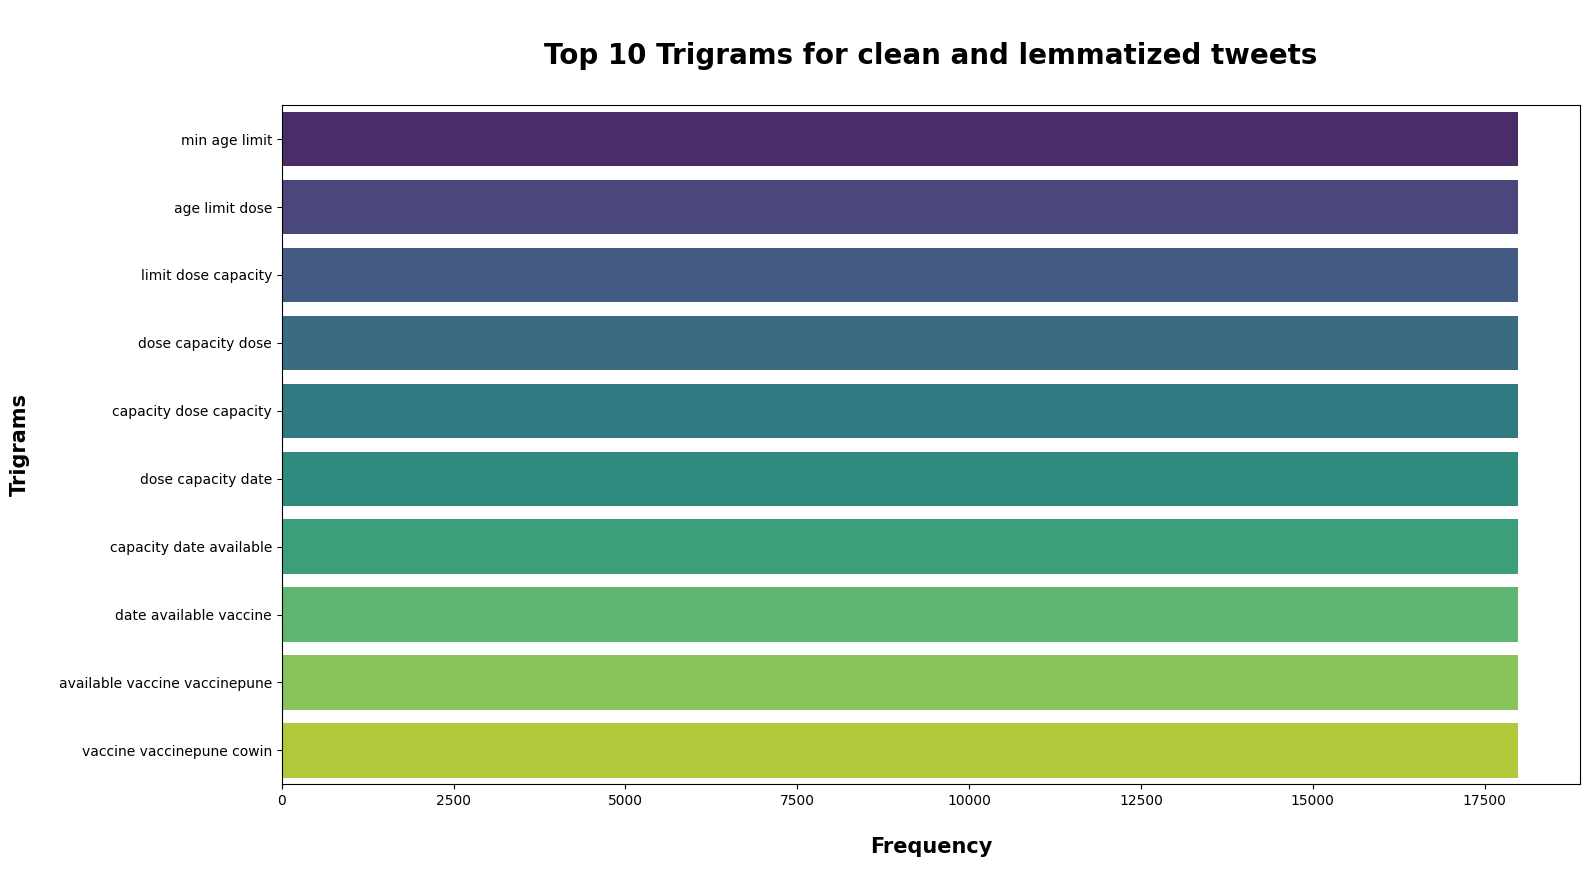

In [70]:
most_common_tri = get_top_text_ngrams(combined_df['cleaned_tweets_lemma'], 10, (3, 3))
most_common_tri = dict(most_common_tri)

fig, ax = plt.subplots(figsize=(16, 9))

# Plot horizontal bar plot
sns.barplot(x=list(most_common_tri.values()), y=list(most_common_tri.keys()), palette='viridis', ax=ax)

# Setting title and labels
ax.set_title('\nTop 10 Trigrams for clean and lemmatized tweets\n', fontsize=20, fontweight='bold')
ax.set_xlabel('\nFrequency\n', fontsize=15, fontweight='bold')
ax.set_ylabel('Trigrams\n', fontsize=15, fontweight='bold')

# Adjusting layout to prevent clipping
plt.tight_layout()

plt.show()

##Implementing Model 2: Textblob

In [71]:
from textblob import TextBlob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
#polarity scores
def get_sentiment_label(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
# Function to get sentiment polarity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis function
combined_df['sentiment_polarity'] = combined_df['cleaned_tweets_lemma'].apply(get_sentiment)

# Apply the sentiment label function to classify sentiments
combined_df['sentiment_label'] = combined_df['sentiment_polarity'].apply(get_sentiment_label)

# Display the updated DataFrame with sentiment analysis results
print(combined_df[['cleaned_tweets_lemma', 'sentiment_polarity', 'sentiment_label']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                cleaned_tweets_lemma  sentiment_polarity  \
0  k dead one year enough convince american get f...                 0.0   
1  pin code pmc g knh hospital covish vaccine cov...                 0.4   
2  pin code pmc p rao hospital bibwewadi vaccine ...                 0.4   
3  message covid vaccine face mask enforcer cdc m...                 0.0   
4  pin code pmc p jehangir hosp sasoon rd vaccine...                 0.4   

  sentiment_label  
0         Neutral  
1        Positive  
2        Positive  
3         Neutral  
4        Positive  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-74-b08c3392c6c4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


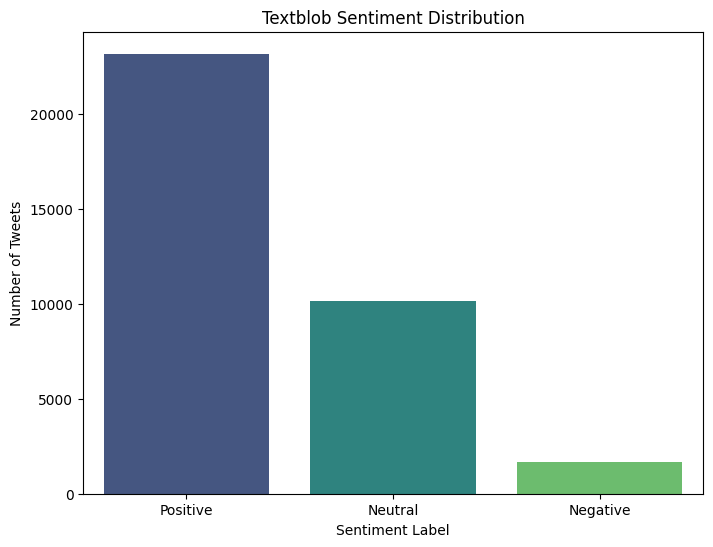

In [74]:
# Count the occurrences of each sentiment label
sentiment_counts = combined_df['sentiment_label'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Textblob Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Tweets')
plt.show()

## Model Training

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
X = combined_df['cleaned_tweets_lemma']
y = combined_df['sentiment_label']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
# Initialize and train SVC
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVC(kernel='linear', random_state=42)

In [80]:
# Predictions and Evaluation for SVC
svc_predictions = svc_model.predict(X_test_tfidf)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_report = classification_report(y_test, svc_predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### The overall accuracy the model is 92%, which means it correctly predicts the sentiment label for 92% of the test data instances.

In [81]:
print("Support Vector Classifier (SVC) Results:")
print(f"Accuracy: {svc_accuracy:.2f}")
print("Classification Report:")
print(svc_report)

Support Vector Classifier (SVC) Results:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.48      0.61       344
     Neutral       0.82      0.94      0.88      2028
    Positive       0.98      0.95      0.96      4630

    accuracy                           0.92      7002
   macro avg       0.88      0.79      0.82      7002
weighted avg       0.93      0.92      0.92      7002



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Implementing Logistic Regression

In [82]:
# Initialize and train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(max_iter=1000, random_state=42)

In [83]:
# Predictions and Evaluation for Logistic Regression
logreg_predictions = logreg_model.predict(X_test_tfidf)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_report = classification_report(y_test, logreg_predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The overall accuracy of  this model is 91%.

In [84]:
print("\nLogistic Regression Results:")
print(f"Accuracy: {logreg_accuracy:.2f}")
print("Classification Report:")
print(logreg_report)


Logistic Regression Results:
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.32      0.47       344
     Neutral       0.79      0.93      0.86      2028
    Positive       0.97      0.94      0.95      4630

    accuracy                           0.91      7002
   macro avg       0.87      0.73      0.76      7002
weighted avg       0.91      0.91      0.90      7002



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Decision Tree Implementation

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)  # Adjust max_features based on your dataset
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
# Initialize the Decision Tree Classifier
clf_decision_tree = DecisionTreeClassifier(random_state=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
# Fit the model
clf_decision_tree.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(random_state=15)

In [89]:
# Predict using the trained model
y_pred_decision_tree = clf_decision_tree.predict(X_test_tfidf)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

    Negative       0.52      0.51      0.51       344
     Neutral       0.82      0.84      0.83      2028
    Positive       0.95      0.94      0.95      4630

    accuracy                           0.89      7002
   macro avg       0.76      0.76      0.76      7002
weighted avg       0.89      0.89      0.89      7002



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Deep Learning Implementation

In [105]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
# Pad sequences
maxlen = 100
X_train_pad = pad_sequences(X_train_tokens, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_tokens, padding='post', maxlen=maxlen)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
# Encode the target labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
# Convert to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
# Define the maximum sequence length and the number of words in the vocabulary
maxlen = 100
vocab_size = 5000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Build LSTM Model

In [103]:
# Define the updated model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
# Compile the model with a different learning rate
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Summary of the updated model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 100, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 821187 (3.13 MB)
Trainable params: 82118

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


During training, it was observed that the model's accuracy and loss metrics plateaued early and validation accuracy and loss stagnated around 66-67%, indicating potential issues with model complexity and training dynamics.
To enhance the model, the architecture was revised to include:
Additional LSTM layers with return_sequences=True and dropout layers (rate of 0.5).
Adjustment of the Adam optimizer's learning rate to 0.001.
The model was then re-trained with these modifications to potentially address overfitting and improve learning dynamics.

In [107]:
# Train the updated model
history = model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


351/351 [==============================] - 203s 554ms/step - loss: 0.7953 - accuracy: 0.6600 - val_loss: 0.7747 - val_accuracy: 0.6680
Epoch 2/10
351/351 [==============================] - 177s 504ms/step - loss: 0.7864 - accuracy: 0.6610 - val_loss: 0.7747 - val_accuracy: 0.6680
Epoch 3/10
351/351 [==============================] - 171s 486ms/step - loss: 0.7845 - accuracy: 0.6610 - val_loss: 0.7745 - val_accuracy: 0.6680
Epoch 4/10
351/351 [==============================] - 252s 719ms/step - loss: 0.7843 - accuracy: 0.6610 - val_loss: 0.7775 - val_accuracy: 0.6680
Epoch 5/10
351/351 [==============================] - 211s 602ms/step - loss: 0.7822 - accuracy: 0.6610 - val_loss: 0.7753 - val_accuracy: 0.6680
Epoch 6/10
351/351 [==============================] - 213s 608ms/step - loss: 0.7820 - accuracy: 0.6610 - val_loss: 0.7744 - val_accuracy: 0.6680
Epoch 7/10
351/351 [==============================] - 176s 500ms/step - loss: 0.7822 - accuracy: 0.6610 - val_loss: 0.7756 - val_accura

In [108]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_cat, verbose=1)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict using the trained model
y_pred_cat = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_cat, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


219/219 [==============================] - 19s 85ms/step - loss: 0.7819 - accuracy: 0.6612
Test Accuracy: 0.66
219/219 [==============================] - 23s 101ms/step


In [109]:
# Convert predictions to the original label encoding
y_test_original = np.argmax(y_test_cat, axis=1)

# Classification Report
from sklearn.metrics import classification_report
print("LSTM Classification Report:")
print(classification_report(y_test_original, y_pred))

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       344
           1       0.00      0.00      0.00      2028
           2       0.66      1.00      0.80      4630

    accuracy                           0.66      7002
   macro avg       0.22      0.33      0.27      7002
weighted avg       0.44      0.66      0.53      7002



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python

The LSTM model can be further improved with more tuning